# Data cleaning
## Original features
| Feature | Description |
|--------|-------------|
| Unnamed: 0 | remove |
| Tank Failure Pressure (bar) | Keep 1 decimal place, round(number, 1), drop value>50 |
| Liquid Ratio | Keep 2 decimal place, round |
| Tank Width (m) | Keep 1 decimal place, round |
| Tank Length (m) | Keep 1 decimal place, round |
| Tank Height (m) | Keep 1 decimal place, round |
| BLEVE Height (m) | Keep 1 decimal place, round, assign value<0 == 0 |
| Vapour Height (m) | Keep 1 decimal place, round |
| Vapour Temperature (K) | Keep 1 decimal place, round |
| Liquid Temperature (K) | Keep 1 decimal place, round |
| Obstacle Distance to BLEVE (m) | |
| Obstacle Width (m) | |
| Obstacle Height (m) | |
| Obstacle Thickness (m) | Keep 1 decimal place, round |
| Obstacle Angle | |
| Status | Correct |
| Liquid Critical Pressure (bar) | |
| Liquid Boiling Temperature (K) | |
| Liquid Critical Temperature (K) | |
| Sensor ID | |
| Sensor Position Side | |
| Sensor Position x | |
| Sensor Position y | |
| Sensor Position z | |
| Target Pressure (bar) | |

# Feature engineering
## Feature Extraction
    Mathematical Combinations and Aggregations: 'Tank Width (m)','Tank Length (m)','Tank Height (m)' and 'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
    'Vapour Height (m)'/'Tank Height (m)', 'Vapour Temperature (K)'/'Liquid Temperature (K)','BLEVE Height (m)'/'Vapour Height (m)','BLEVE Height (m)'/'Tank Height (m)', offset=tan(angel) * 'Obstacle Distance to BLEVE (m)'
    Binning and Discretization: 'Sensor Position Side', 'Sensor ID', 'Liquid Critical Pressure (bar)', 'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)'
    Automated Feature Generation
    Data Augmentation
## Feature Transformation
    Feature Transformation
    Encoding Categorical Variables
    Feature Extraction and Dimensionality Reduction

# Model development
• Model selection: you need to examine at least three different machine learning models, such as linear models, support vector regression, random forest, xgboost, neural networks, or any other models you think it is suitable.
• Hyparameter tuning: note that for any machine learning model there are several
hyperparameters that are critical for the model’s performance. You will need to tune
these hyperparameters carefully to get good results.
• Evaluation metrics: the compulsory evaluation metrics for this assignment are
MAPE (Mean Absolute Percentage Error) and R2, which are both available in Scikitlearn library. You can use additional metrics, such as RMSE, MAE, etc.

## Models
linear models
support vector regression
random forest
xgboost
neural networks


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import sklearn
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, mean_absolute_error, median_absolute_error
from tempfile import mkdtemp
from shutil import rmtree
import time

In [2]:
%matplotlib inline
sns.set_theme()
pd.set_option("display.max_columns", None)

In [3]:
import logging
logger = logging.getLogger('sklearnex')
logger.setLevel(logging.INFO)

In [4]:
sklearn.set_config(transform_output="pandas")
sklearn.get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'diagram',
 'pairwise_dist_chunk_size': 256,
 'enable_cython_pairwise_dist': True,
 'array_api_dispatch': False,
 'transform_output': 'pandas',
 'enable_metadata_routing': False,
 'skip_parameter_validation': False}

In [5]:
import sklearnex
from sklearnex import patch_sklearn, config_context
sklearnex.set_config(target_offload="gpu:0")
sklearnex.set_config(allow_fallback_to_host=True)
patch_sklearn()
with config_context(target_offload="gpu:0"):
    pass


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [6]:

sklearnex.get_config()

{'assume_finite': False,
 'working_memory': 1024,
 'print_changed_only': True,
 'display': 'diagram',
 'pairwise_dist_chunk_size': 256,
 'enable_cython_pairwise_dist': True,
 'array_api_dispatch': False,
 'transform_output': 'pandas',
 'enable_metadata_routing': False,
 'skip_parameter_validation': False,
 'target_offload': 'gpu:0',
 'allow_fallback_to_host': True,
 'allow_sklearn_after_onedal': True,
 'use_raw_input': False}

In [7]:
def loadDataset(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
    print(df.describe())
    print(df.info())
    print(df.columns)
    return df

In [8]:
# Load the dataset
df = loadDataset("train.csv")

# Load the dataset
df_test = loadDataset("test.csv")

   Unnamed: 0  Tank Failure Pressure (bar)  Liquid Ratio  Tank Width (m)  \
0      3203.0                        14.26          0.25            1.58   
1      3204.0                        14.14          0.25            1.59   
2      3205.0                        14.05          0.24            1.62   
3      3206.0                        14.17          0.24            1.59   
4      3207.0                        14.09          0.24            1.59   

   Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0             8.61             1.79              1.01               1.40   
1             8.58             1.81              1.00               1.41   
2             8.59             1.79              0.98               1.38   
3             8.60             1.80              0.98               1.40   
4             8.60             1.80              1.00               1.40   

   Vapour Temperature (K)  Liquid Temperature (K)  \
0                  457.14        

In [9]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10043 non-null  float64
 1   Tank Failure Pressure (bar)      10040 non-null  float64
 2   Liquid Ratio                     10041 non-null  float64
 3   Tank Width (m)                   10043 non-null  float64
 4   Tank Length (m)                  10045 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10022 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float64
 11  Obstacle Width (m)               10042 non-null  float64
 12  Obstacle Height (m

In [10]:
def convertDataType(df, format_from='float64', format_to='float32'):
    selected_cols = list(df.select_dtypes(include=format_from))
    if selected_cols:
        df[selected_cols] = df[selected_cols].astype(format_to)
    return df

In [11]:
convertDataType(df, 'float64', 'float32')
convertDataType(df, 'int64', 'float32')
df.info()
convertDataType(df_test, 'float64', 'float32')
convertDataType(df_test, 'int64', 'float32')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10043 non-null  float32
 1   Tank Failure Pressure (bar)      10040 non-null  float32
 2   Liquid Ratio                     10041 non-null  float32
 3   Tank Width (m)                   10043 non-null  float32
 4   Tank Length (m)                  10045 non-null  float32
 5   Tank Height (m)                  10042 non-null  float32
 6   BLEVE Height (m)                 10040 non-null  float32
 7   Vapour Height (m)                10041 non-null  float32
 8   Vapour Temperature (K)           10022 non-null  float32
 9   Liquid Temperature (K)           10022 non-null  float32
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float32
 11  Obstacle Width (m)               10042 non-null  float32
 12  Obstacle Height (m

In [12]:
def showHistogram(df):
    # Show the histogram of the data
    df.hist(figsize=(40,20), bins=30, edgecolor='black', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [13]:
def showCategoricalData(df):
    # For categorical data, show the count of each category
    for col in df.columns:
        if df[col].dtype == 'object':
            print(df[col].value_counts())

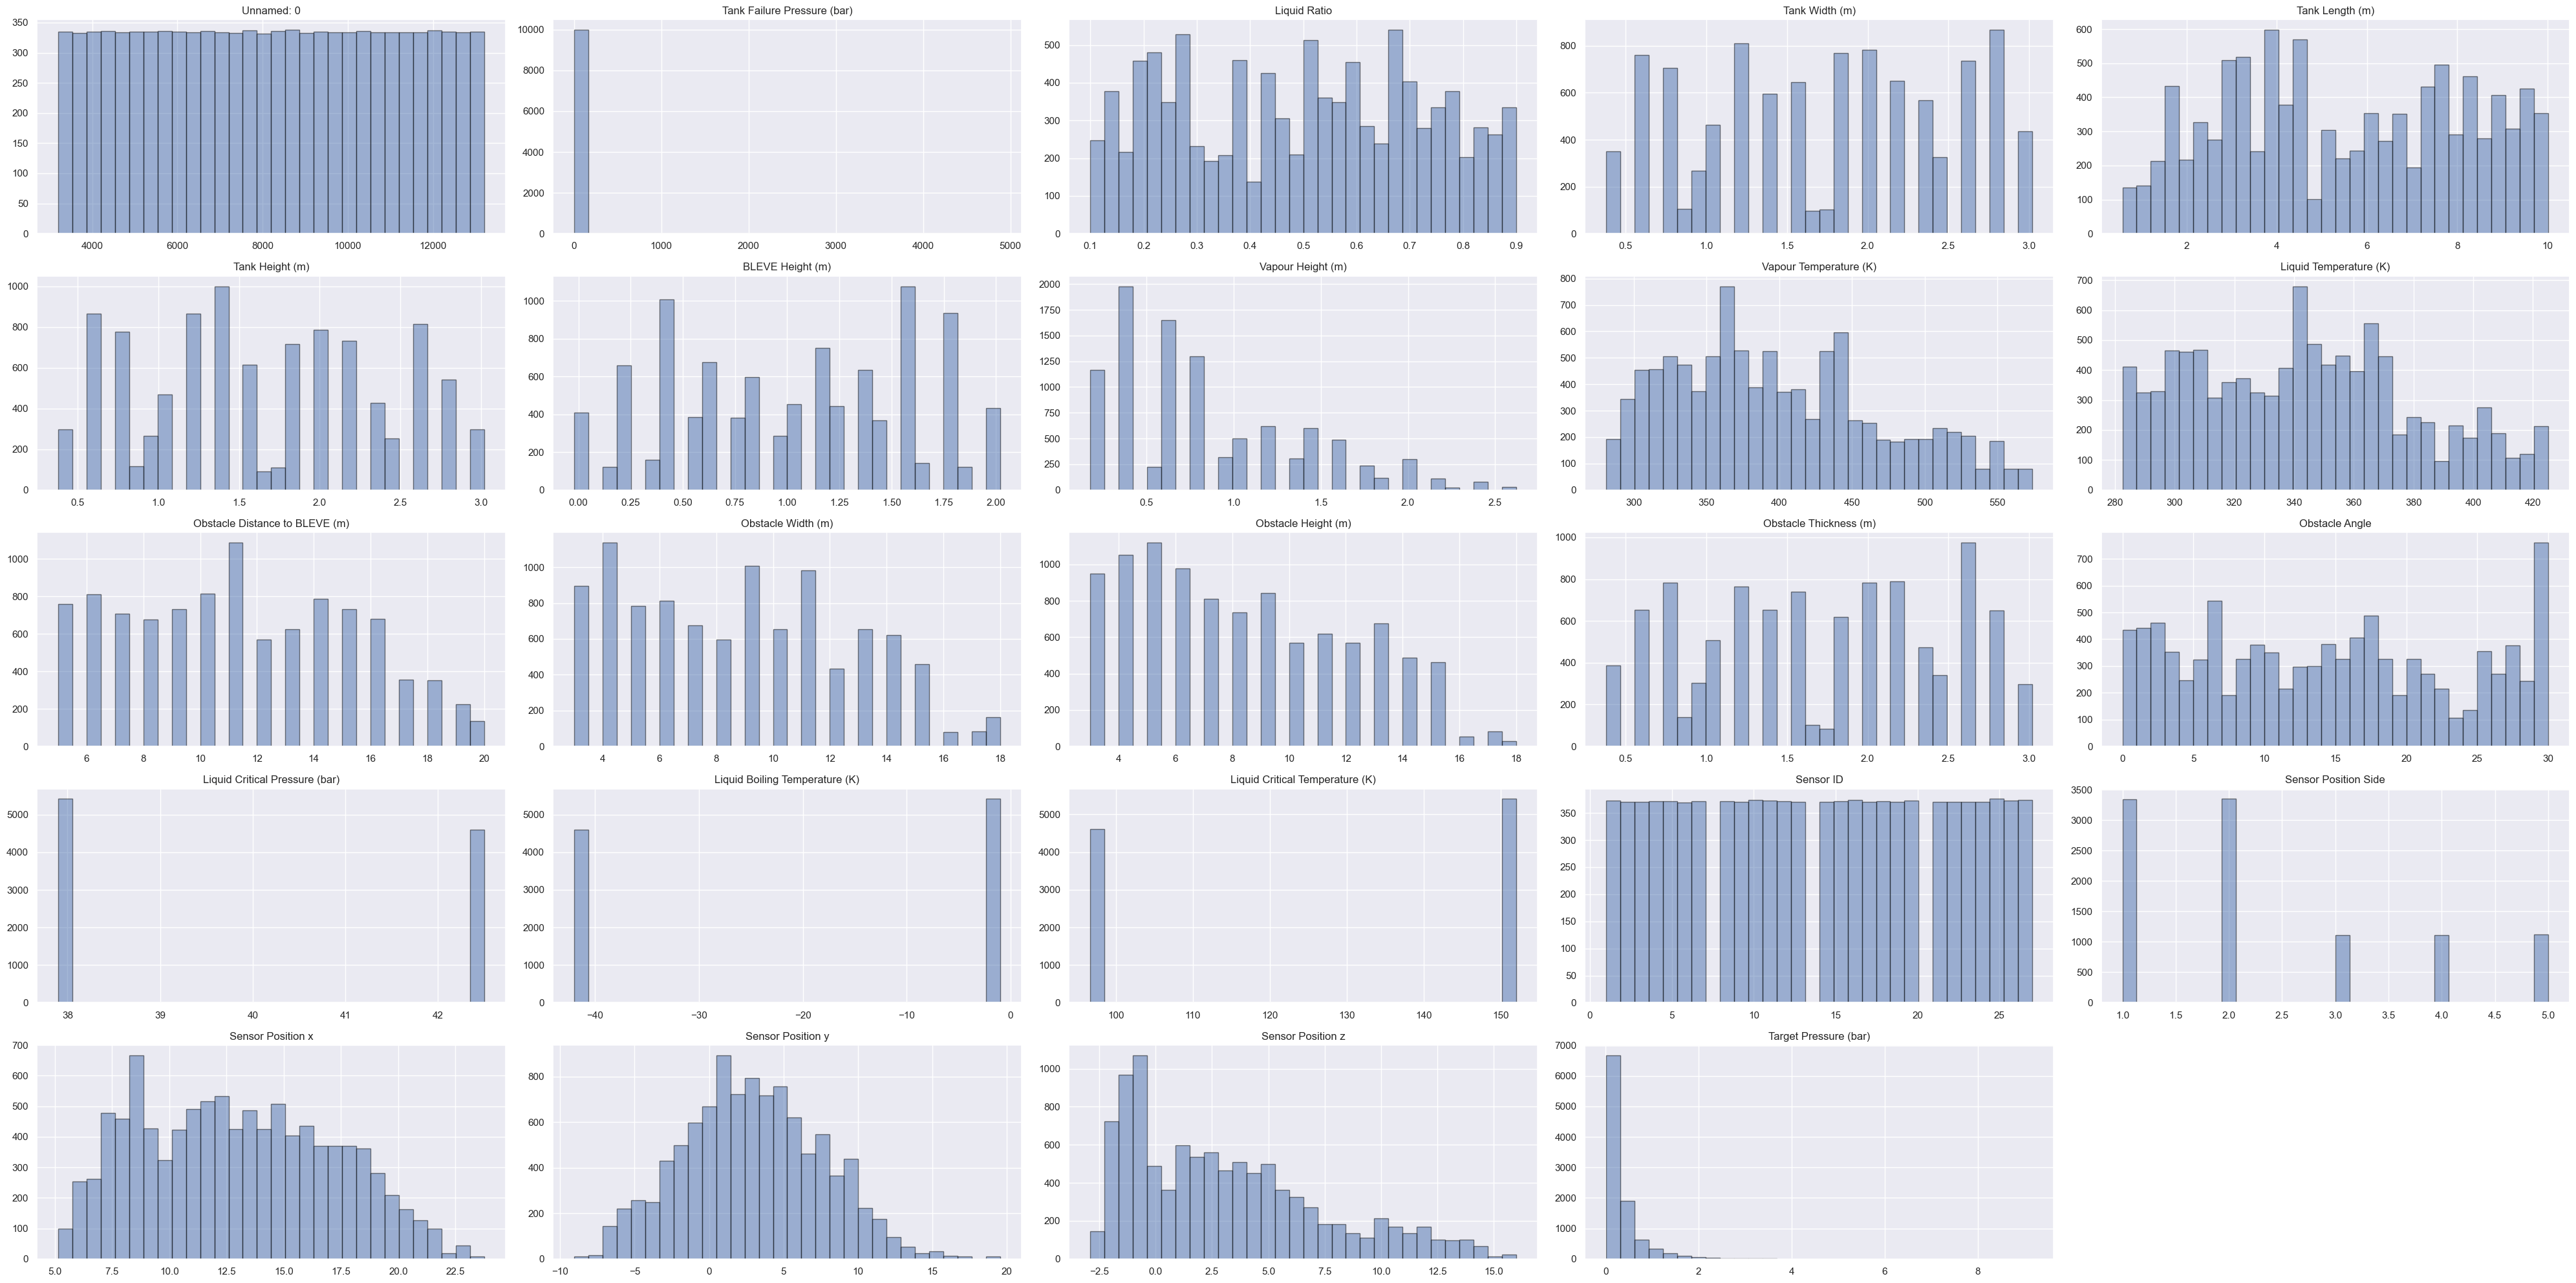

Status
Subcooled      6208
Superheated    3754
subcooled        23
Subcool          17
Subcoled         14
Saperheated      10
superheated       9
Superheat         7
Name: count, dtype: int64


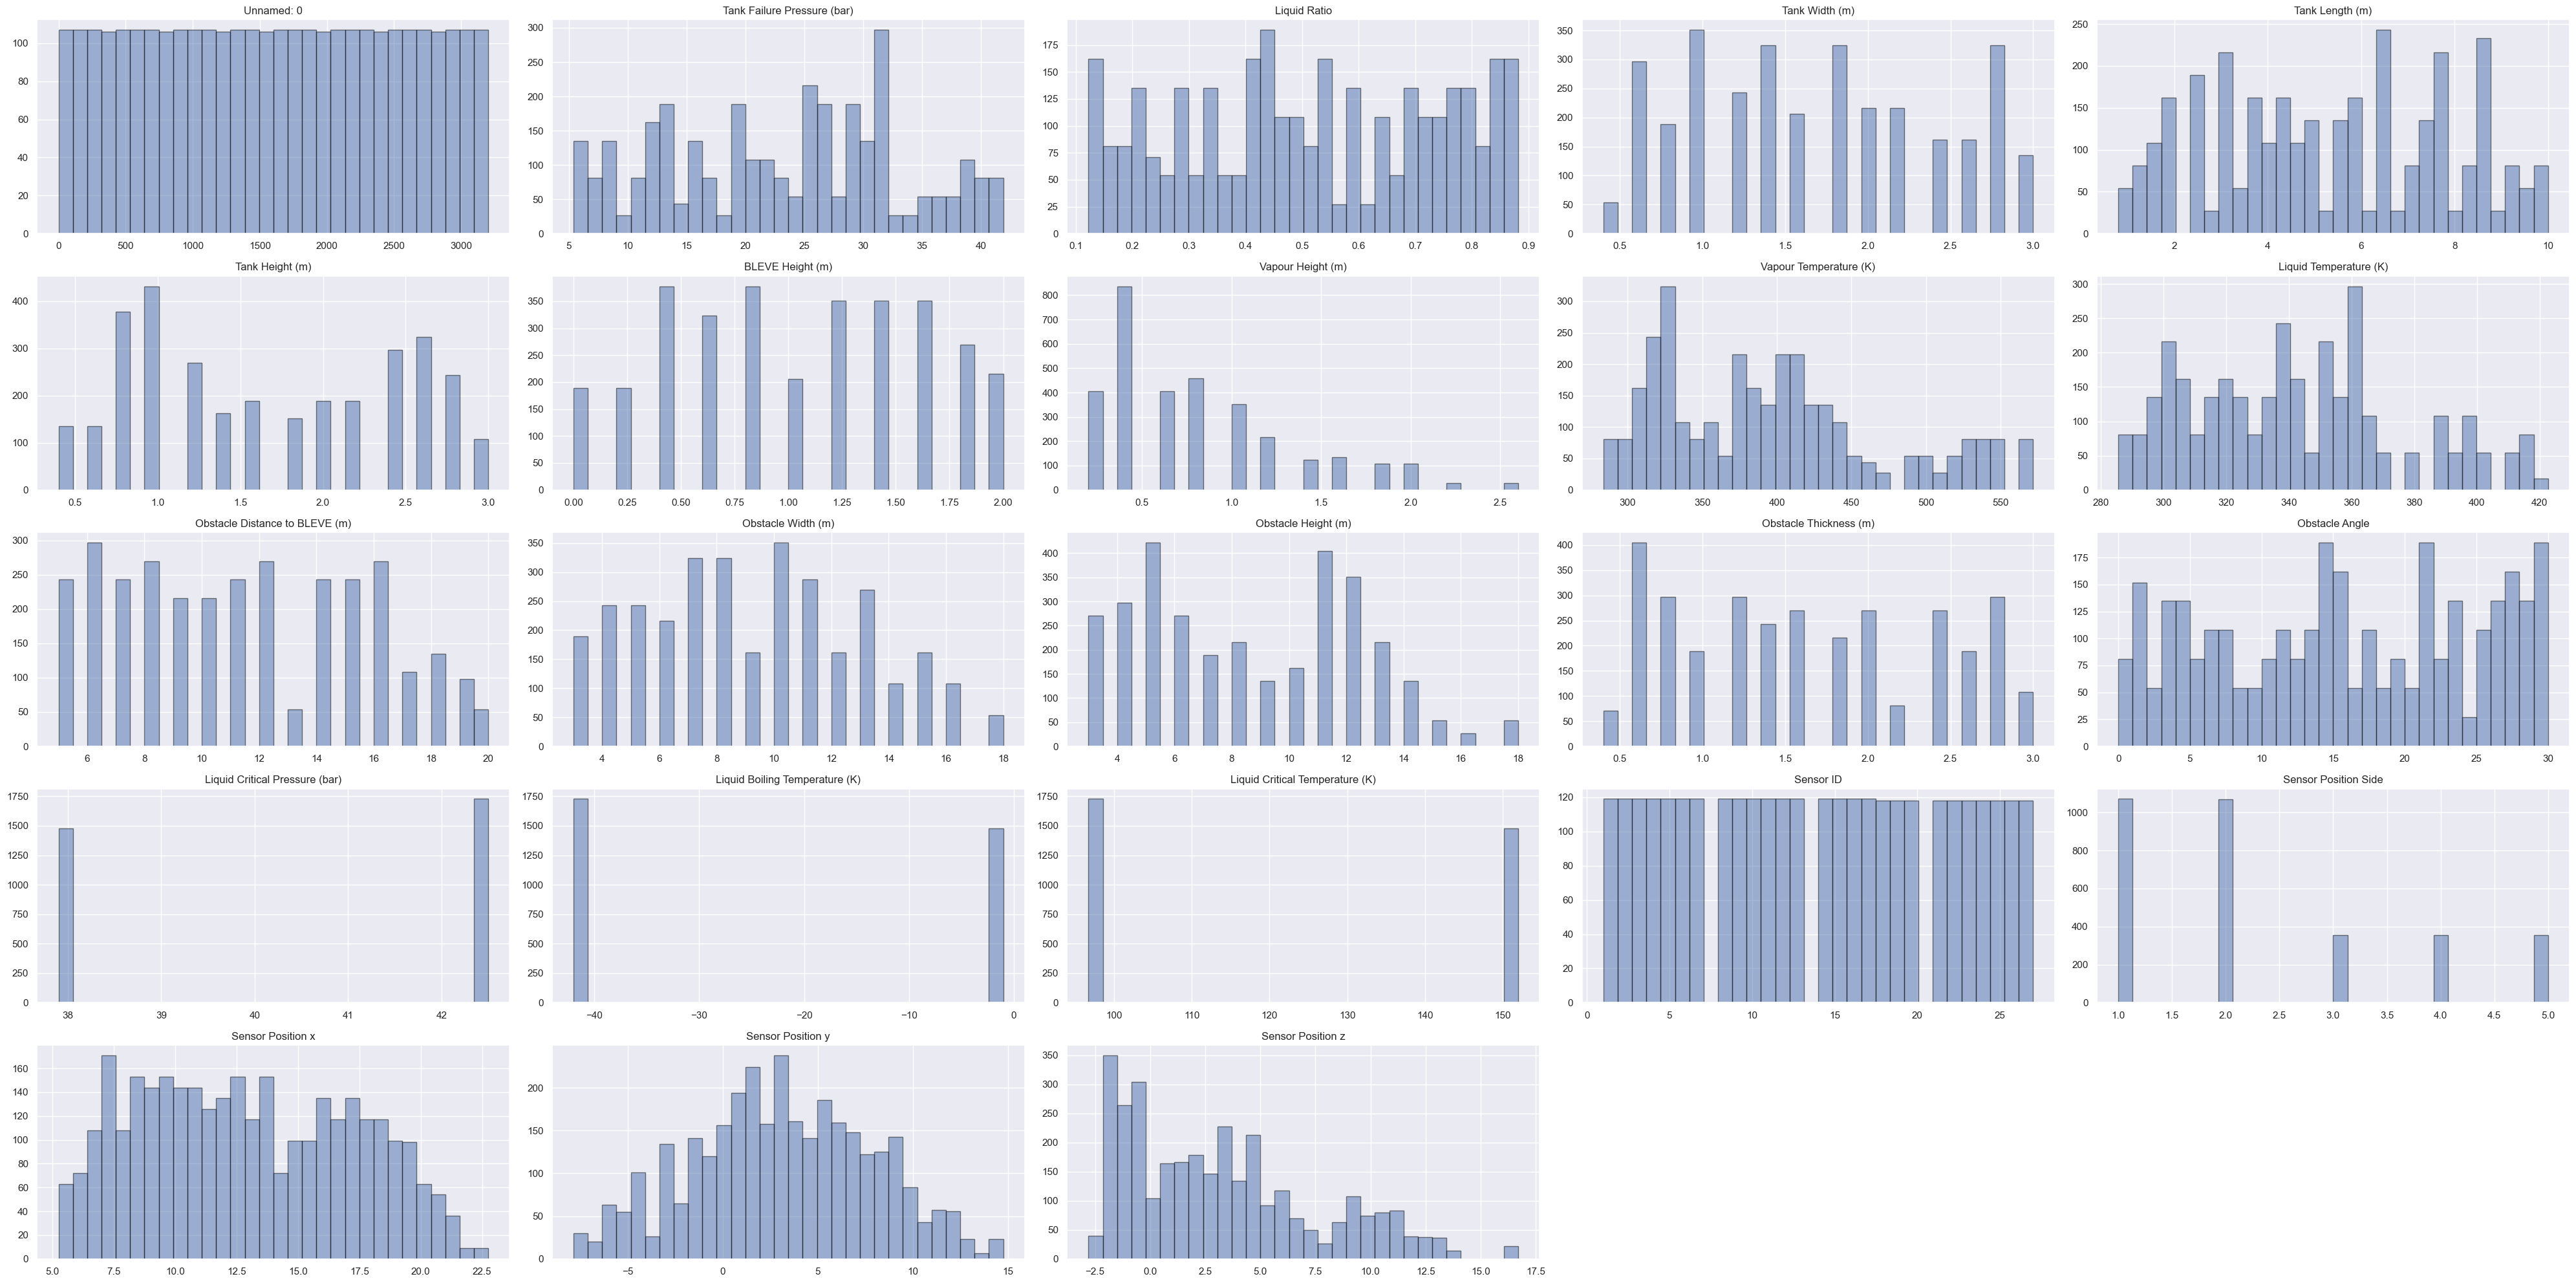

Status
Subcooled      1971
Superheated    1232
Name: count, dtype: int64


In [14]:
showHistogram(df)
showCategoricalData(df)

showHistogram(df_test)
showCategoricalData(df_test)

In [15]:
# Only for training data
def handleMissingValues(df):
    # Check for missing values
    # print(df.isnull().sum())
    # print(df.info())
    # Drop rows with missing values
    df_dropna = df.dropna(axis=0)
    # Reset index
    # df_dropna.reset_index(drop=True, inplace=True)
    # print(df_dropna.info())
    return df_dropna

In [16]:
def correctCategoricalData(df):
    # Update the incorrect categorical data
    # Align the categorical data to Subcooled, Superheated
    COL_STATUS = 'Status'
    VAL_SUBCOOLED = 'Subcooled'
    VAL_SUPERHEATED = 'Superheated'
    WRONG_VALUE_SUB = ['subcooled', 'Subcool', 'Subcoled']
    WRONG_VALUE_SUP = ['Saperheated', 'superheated', 'Superheat']
    for value in WRONG_VALUE_SUB:
        df[COL_STATUS] = df[COL_STATUS].replace(value, VAL_SUBCOOLED)
    for value in WRONG_VALUE_SUP:
        df[COL_STATUS] = df[COL_STATUS].replace(value, VAL_SUPERHEATED)
    return df

In [17]:
def dropUnusedColumns(df, columns=['Unnamed: 0']):
    # Drop unused columns
    try:
        df_drop = df.drop(columns=columns)
    except KeyError as e:
        print(e)
    # print(df_drop.info())
    return df_drop

In [18]:
# Only for training data
def removeDuplicates(df):
    # Remove duplicates
    # print(df.info())
    df_drop_duplicates = df.drop_duplicates()
    # print(df_drop_duplicates.info())
    return df_drop_duplicates

In [19]:
def convertInt64ToFloat64(df):
    # Convert all int64 columns to float64, except object columns
    df_float64 = df.astype({col: 'float64' for col in df.columns if df[col].dtype == 'int64'})
    return df_float64

In [20]:
def handleDecimalPlaces(df, round=True):
    # Handle decimal places
    # Columns keep 1 decimal place and round
    COLS_1 = ['Tank Failure Pressure (bar)', 'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
            'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)', 'Liquid Temperature (K)',
            'Obstacle Thickness (m)']
    # Columns keep 2 decimal place and round
    COLS_2 = ['Liquid Ratio']
    if round:
        for col in COLS_1:
            df[col] = df[col].round(1)
        for col in COLS_2:
            df[col] = df[col].round(2)
    return df

In [21]:
def showBoxplot(df):
    # Combine all plots into one
    fig, axs = plt.subplots(1, len(df.columns), figsize=(4 * len(df.columns), 10))
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axs[i])
    plt.tight_layout()
    plt.show()

In [22]:
# Only for training data
def handleOutliers(df):
    # Check for outliers
    # print(df.describe())
    # print(df.info())
    # Drop outliers which 'Tank Failure Pressure (bar)' is more than 50 bar and 'Target Pressure (bar)' is more than 5 bar
    COLS = ['Tank Failure Pressure (bar)', 'Target Pressure (bar)']
    THRESHOLDS = [50, 5]
    for COL, THRESHOLD in zip(COLS, THRESHOLDS):
        if COL in df.columns:
            df = df[df[COL] < THRESHOLD]
    # Drop outliers which 'BLEVE Height (m)' < 0
    df = df[df['BLEVE Height (m)'] >= 0]
    # print(df.describe())
    # print(df.info())
    return df

In [23]:
def createNewFeatures(df, round=True):
    # Create new features
    if round:
        df['Tank Width (m)/Tank Length (m)'] = (df['Tank Width (m)'] / df['Tank Length (m)']).round(2)
        df['Tank Width (m)/Tank Height (m)'] = (df['Tank Width (m)'] / df['Tank Height (m)']).round(2)
        df['Tank Length (m)/Tank Height (m)'] = (df['Tank Length (m)'] / df['Tank Height (m)']).round(2)
        df['Tank Length (m)/Tank Width (m)'] = (df['Tank Length (m)'] / df['Tank Width (m)']).round(2)
        df['Tank Height (m)/Tank Width (m)'] = (df['Tank Height (m)'] / df['Tank Width (m)']).round(2)
        df['Tank Height (m)/Tank Length (m)'] = (df['Tank Height (m)'] / df['Tank Length (m)']).round(2)

        df['Tank Width (m)*Tank Length (m)'] = (df['Tank Width (m)'] * df['Tank Length (m)']).round(2)
        df['Tank Width (m)*Tank Height (m)'] = (df['Tank Width (m)'] * df['Tank Height (m)']).round(2)
        df['Tank Length (m)*Tank Height (m)'] = (df['Tank Length (m)'] * df['Tank Height (m)']).round(2)
        df['Tank Width (m)*Tank Length (m)*Tank Height (m)'] = (df['Tank Width (m)'] * df['Tank Length (m)'] * df['Tank Height (m)']).round(2)
        df['Vapour Height (m)/Tank Height (m)'] = (df['Vapour Height (m)'] / df['Tank Height (m)']).round(2)
        df['Vapour Temperature (K)/Liquid Temperature (K)'] = (df['Vapour Temperature (K)'] / df['Liquid Temperature (K)']).round(2)
        df['BLEVE Height (m)/Vapour Height (m)'] = (df['BLEVE Height (m)'] / df['Vapour Height (m)']).round(2)
        df['BLEVE Height (m)/Tank Height (m)'] = (df['BLEVE Height (m)'] / df['Tank Height (m)']).round(2)

        df['Obstacle Width (m)/Obstacle Thickness (m)'] = (df['Obstacle Width (m)'] / df['Obstacle Thickness (m)']).round(2)
        df['Obstacle Width (m)/Obstacle Height (m)'] = (df['Obstacle Width (m)'] / df['Obstacle Height (m)']).round(2)
        df['Obstacle Thickness (m)/Obstacle Height (m)'] = (df['Obstacle Thickness (m)'] / df['Obstacle Height (m)']).round(2)
        df['Obstacle Thickness (m)/Obstacle Width (m)'] = (df['Obstacle Thickness (m)'] / df['Obstacle Width (m)']).round(2)
        df['Obstacle Height (m)/Obstacle Width (m)'] = (df['Obstacle Height (m)'] / df['Obstacle Width (m)']).round(2)
        df['Obstacle Height (m)/Obstacle Thickness (m)'] = (df['Obstacle Height (m)'] / df['Obstacle Thickness (m)']).round(2)

        df['Obstacle Width (m)*Obstacle Thickness (m)'] = (df['Obstacle Width (m)'] * df['Obstacle Thickness (m)']).round(2)
        df['Obstacle Width (m)*Obstacle Height (m)'] = (df['Obstacle Width (m)'] * df['Obstacle Height (m)']).round(2)
        df['Obstacle Thickness (m)*Obstacle Height (m)'] = (df['Obstacle Thickness (m)'] * df['Obstacle Height (m)']).round(2)
        df['Obstacle Width (m)*Obstacle Thickness (m)*Obstacle Height (m)'] = (df['Obstacle Width (m)'] * df['Obstacle Thickness (m)'] * df['Obstacle Height (m)']).round(2)
        df['Obstacle Offset'] = np.tan(df['Obstacle Angle']) * df['Obstacle Distance to BLEVE (m)'].round(2)
    else:
        df['Tank Width (m)/Tank Length (m)'] = df['Tank Width (m)'] / df['Tank Length (m)']
        df['Tank Width (m)/Tank Height (m)'] = df['Tank Width (m)'] / df['Tank Height (m)']
        df['Tank Length (m)/Tank Height (m)'] = df['Tank Length (m)'] / df['Tank Height (m)']
        df['Tank Length (m)/Tank Width (m)'] = df['Tank Length (m)'] / df['Tank Width (m)']
        df['Tank Height (m)/Tank Width (m)'] = df['Tank Height (m)'] / df['Tank Width (m)']
        df['Tank Height (m)/Tank Length (m)'] = df['Tank Height (m)'] / df['Tank Length (m)']

        df['Tank Width (m)*Tank Length (m)'] = df['Tank Width (m)'] * df['Tank Length (m)']
        df['Tank Width (m)*Tank Height (m)'] = df['Tank Width (m)'] * df['Tank Height (m)']
        df['Tank Length (m)*Tank Height (m)'] = df['Tank Length (m)'] * df['Tank Height (m)']
        df['Tank Width (m)*Tank Length (m)*Tank Height (m)'] = df['Tank Width (m)'] * df['Tank Length (m)'] * df['Tank Height (m)']
        df['Vapour Height (m)/Tank Height (m)'] = df['Vapour Height (m)'] / df['Tank Height (m)']
        df['Vapour Temperature (K)/Liquid Temperature (K)'] = df['Vapour Temperature (K)'] / df['Liquid Temperature (K)']
        df['BLEVE Height (m)/Vapour Height (m)'] = df['BLEVE Height (m)'] / df['Vapour Height (m)']
        df['BLEVE Height (m)/Tank Height (m)'] = df['BLEVE Height (m)'] / df['Tank Height (m)']

        df['Obstacle Width (m)/Obstacle Thickness (m)'] = df['Obstacle Width (m)'] / df['Obstacle Thickness (m)']
        df['Obstacle Width (m)/Obstacle Height (m)'] = df['Obstacle Width (m)'] / df['Obstacle Height (m)']
        df['Obstacle Thickness (m)/Obstacle Height (m)'] = df['Obstacle Thickness (m)'] / df['Obstacle Height (m)']
        df['Obstacle Thickness (m)/Obstacle Width (m)'] = df['Obstacle Thickness (m)'] / df['Obstacle Width (m)']
        df['Obstacle Height (m)/Obstacle Width (m)'] = df['Obstacle Height (m)'] / df['Obstacle Width (m)']
        df['Obstacle Height (m)/Obstacle Thickness (m)'] = df['Obstacle Height (m)'] / df['Obstacle Thickness (m)']

        df['Obstacle Width (m)*Obstacle Thickness (m)'] = df['Obstacle Width (m)'] * df['Obstacle Thickness (m)']
        df['Obstacle Width (m)*Obstacle Height (m)'] = df['Obstacle Width (m)'] * df['Obstacle Height (m)']
        df['Obstacle Thickness (m)*Obstacle Height (m)'] = df['Obstacle Thickness (m)'] * df['Obstacle Height (m)']
        df['Obstacle Width (m)*Obstacle Thickness (m)*Obstacle Height (m)'] = df['Obstacle Width (m)'] * df['Obstacle Thickness (m)'] * df['Obstacle Height (m)']
        df['Obstacle Offset'] = np.tan(df['Obstacle Angle']) * df['Obstacle Distance to BLEVE (m)']
        
    return df


In [24]:
# Convert categorical variables to numerical
def encodeCategoricalData(df):
    cat_cols = ['Status', 'Sensor Position Side', 'Sensor ID', 'Liquid Critical Pressure (bar)',
                'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)']
    # One-hot encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder = encoder.fit(df[cat_cols])
    # print(encoder.categories_)
    df_encode = encoder.transform(df[cat_cols])
    df_encode = pd.DataFrame(df_encode, columns=encoder.get_feature_names_out(cat_cols))
    # Drop the original categorical columns and merge the encoded columns
    df_drop = df.drop(columns=cat_cols)
    df_merge = pd.concat([df_drop, df_encode], axis=1)
    return df_merge


In [25]:
def getFeatureColumns(df):
    categorical_features = ['Status', 'Sensor Position Side', 'Sensor ID', 'Liquid Critical Pressure (bar)',
                            'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)']
    # Get other columns as numeric_features
    numeric_features = [col for col in df.columns if col not in categorical_features]
    return numeric_features, categorical_features

In [26]:
def compute_score(y_true, y_pred):
    return {
        "R2": f"{r2_score(y_true, y_pred):.3f}",
        "MSE": f"{mean_squared_error(y_true, y_pred):.3f}",
        "RMSE": f"{root_mean_squared_error(y_true, y_pred):.3f}",
        "MAE": f"{mean_absolute_error(y_true, y_pred):.3f}",
        "MAPE": f"{mean_absolute_percentage_error(y_true, y_pred):.3f}",
        "MedAE": f"{median_absolute_error(y_true, y_pred):.3f}",
    }

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
class HighCorrTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, *, threshold=0.95):
        self.threshold = threshold
        self.removed_features = []
    def fit(self, X, y=None):
        features = list(X.columns)
        print(f"\nInitial number of features: {len(features)}")
        # High Correlation Filter
        # Calculate correlation matrix
        corr_matrix = X.corr().abs()

        # Create mask for upper triangle to avoid duplicate pairs
        upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

        # Find feature pairs with correlation greater than threshold
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if corr_matrix.iloc[i,j] > self.threshold:
                    high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

        # Print highly correlated feature pairs
        print(f"\nHighly correlated feature pairs (correlation > {self.threshold}):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"{feat1} -- {feat2}: {corr:.3f}")

        # Keep one feature from each highly correlated pair (the first one)
        features_to_drop = set()
        for feat1, feat2, _ in high_corr_pairs:
            features_to_drop.add(feat2)

        # Get final selected features
        final_features = [f for f in features if f not in features_to_drop]
        print(f"\nNumber of features after correlation filtering: {len(final_features)}")
        print("Removed features:", list(features_to_drop))
        self.removed_features = features_to_drop
        # Create new dataframe with only selected features
        # X.drop(columns=self.removed_features, axis=1, inplace=True)
        return self
    def transform(self, X):
        X.drop(columns=self.removed_features, axis=1, inplace=True)
        return X

In [28]:
# def filter_high_correlation(X_train, plot=False, threshold=0.95):
#     # Get column names (features) from X_train DataFrame
#     features = list(X_train.columns)
#     print(f"\nInitial number of features: {len(features)}")
#     # High Correlation Filter
#     # Calculate correlation matrix
#     corr_matrix = X_train.corr().abs()

#     # Create mask for upper triangle to avoid duplicate pairs
#     upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

#     # Find feature pairs with correlation greater than threshold
#     high_corr_pairs = []
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i+1, len(corr_matrix.columns)):
#             if corr_matrix.iloc[i,j] > threshold:
#                 high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i,j]))

#     # Print highly correlated feature pairs
#     print(f"\nHighly correlated feature pairs (correlation > {threshold}):")
#     for feat1, feat2, corr in high_corr_pairs:
#         print(f"{feat1} -- {feat2}: {corr:.3f}")

#     # Keep one feature from each highly correlated pair (the first one)
#     features_to_drop = set()
#     for feat1, feat2, _ in high_corr_pairs:
#         features_to_drop.add(feat2)

#     # Get final selected features
#     final_features = [f for f in features if f not in features_to_drop]
#     print(f"\nNumber of features after correlation filtering: {len(final_features)}")
#     print("Removed features:", list(features_to_drop))

#     # Plot correlation matrix heatmap
#     if plot:
#         plt.figure(figsize=(15, 12))
#         sns.heatmap(corr_matrix, 
#                     mask=upper,
#                     annot=True, 
#                     cmap='coolwarm', 
#                     center=0,
#                     fmt='.2f',
#                     square=True)
#         plt.title('Feature Correlation Matrix')
#         plt.tight_layout()
#         plt.show()
#     # Create new dataframe with only selected features
#     X_train_filtered = X_train[final_features]
#     return X_train_filtered

In [29]:
# def filter_low_variance(X, threshold=0.01):
#     # Apply low variance filter to remove features with very low variance
#     selector = VarianceThreshold(threshold=threshold)
#     X_trans = selector.fit_transform(X)
#     # Get the selected feature names
#     features = X_trans.columns[selector.get_support()].tolist()
#     print(f"Number of features after low variance filtering: {len(features)}")
#     print("Removed features:", list(set(X.columns) - set(features)))
#     return X[features]

In [30]:
# def apply_rfe(X, y):
#     features = list(X.columns)
#     # Recursive Feature Elimination (RFE)
#     # Initialize the base estimator (Random Forest Regressor)
#     base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)

#     # Initialize RFE with desired number of features (e.g., 50% of current features)
#     n_features_to_select = len(features) // 2
#     rfe = RFE(estimator=base_estimator, n_features_to_select=n_features_to_select)

#     # Fit RFE
#     print(X, y)
#     X_trans = rfe.fit_transform(X, y)

#     # Get selected feature indices and names
#     selected_features_rfe = [features[i] for i in range(len(features)) if rfe.support_[i]]

#     print(f"\nNumber of features after RFE: {len(selected_features_rfe)}")
#     print("Selected features:", selected_features_rfe)
#     print("Removed features:", list(set(X.columns) - set(selected_features_rfe)))
#     return X[selected_features_rfe]


In [31]:
pipe_prepare = Pipeline([
    # ('remove_missing', FunctionTransformer(handleMissingValues)),
    # ('correct_categorical', FunctionTransformer(correctCategoricalData)),
    # ('drop_unused', FunctionTransformer(dropUnusedColumns)),
    # ('remove_duplicates', FunctionTransformer(removeDuplicates)),
    # ('convert_to_float', FunctionTransformer(convertInt64ToFloat64)),
    ('handle_decimal_places', FunctionTransformer(handleDecimalPlaces)),
    # ('handle_outliers', FunctionTransformer(handleOutliers)),
    ('create_new_features', FunctionTransformer(createNewFeatures)),
])

numeric_features = ['Tank Failure Pressure (bar)', 'Liquid Ratio', 'Tank Width (m)', 'Tank Length (m)',
                    'Tank Height (m)', 'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
                    'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)', 'Obstacle Width (m)', 'Obstacle Height (m)',
                    'Obstacle Thickness (m)', 'Obstacle Angle', 'Sensor Position x', 'Sensor Position y',
                    'Sensor Position z', 'Tank Width (m)/Tank Length (m)', 'Tank Width (m)/Tank Height (m)', 'Tank Length (m)/Tank Height (m)',
                    'Tank Width (m)*Tank Length (m)', 'Tank Length (m)/Tank Width (m)', 'Tank Height (m)/Tank Width (m)', 'Tank Height (m)/Tank Length (m)',
                    'Tank Width (m)*Tank Height (m)', 'Tank Length (m)*Tank Height (m)', 'Tank Width (m)*Tank Length (m)*Tank Height (m)',
                    'Vapour Height (m)/Tank Height (m)', 'Vapour Temperature (K)/Liquid Temperature (K)',
                    'BLEVE Height (m)/Vapour Height (m)', 'BLEVE Height (m)/Tank Height (m)',
                    'Obstacle Width (m)/Obstacle Thickness (m)', 'Obstacle Width (m)/Obstacle Height (m)', 'Obstacle Thickness (m)/Obstacle Height (m)',
                    'Obstacle Thickness (m)/Obstacle Width (m)', 'Obstacle Height (m)/Obstacle Width (m)', 'Obstacle Height (m)/Obstacle Thickness (m)',
                    'Obstacle Width (m)*Obstacle Thickness (m)', 'Obstacle Width (m)*Obstacle Height (m)', 'Obstacle Thickness (m)*Obstacle Height (m)',
                    'Obstacle Width (m)*Obstacle Thickness (m)*Obstacle Height (m)', 'Obstacle Offset']
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
])
categorical_features = ['Status', 'Sensor ID', 'Sensor Position Side', 'Liquid Critical Pressure (bar)',
                        'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)']
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
    # ('selector', )
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

# Create a pipeline for feature selection
pipe_feature_selection = Pipeline([
    ('data_format_float', FunctionTransformer(convertDataType)),
    ('data_format_int', FunctionTransformer(convertDataType)),
    ('correlation_filter', HighCorrTransformer(threshold=0.9)),
    ('variance_filter', VarianceThreshold(threshold=0.1)),
    # ('rfe', RFE(estimator=RandomForestRegressor(n_estimators=100, n_jobs=-2, random_state=42),
    #             n_features_to_select=0.5))
])
pipe_feature_selection.set_params(data_format_float__kw_args={'format_from': 'float64', 'format_to': 'float32'},
                                  data_format_int__kw_args={'format_from': 'int64', 'format_to': 'int32'},
                                  correlation_filter__threshold=0.98, # 0.8
                                  variance_filter__threshold=0.1,)
                                #   rfe__n_features_to_select=0.5)

pipe_data_preprocessing = Pipeline([
    ('prepare', pipe_prepare),
    ('preprocessor', preprocessor),
    ('selection', pipe_feature_selection),
])

In [32]:
df_clean = df
df_clean = handleMissingValues(df_clean)
df_clean = dropUnusedColumns(df_clean)
df_clean = correctCategoricalData(df_clean)
df_clean = removeDuplicates(df_clean)
df_clean = handleOutliers(df_clean)
COL_TARGET = 'Target Pressure (bar)'
X_train_ori = df_clean.drop(columns=[COL_TARGET], axis=1)
y_train_ori = df_clean[COL_TARGET]
y_train_2d = y_train_ori.to_numpy().reshape(-1, 1)
pt = PowerTransformer(method='box-cox').fit(y_train_2d)
y = pt.transform(y_train_2d).values.flatten()

In [33]:

X = pipe_data_preprocessing.fit_transform(X_train_ori, y)
# print(X_train_ori.info())
# X = pipe_prepare.fit_transform(X_train_ori, y)
# X = preprocessor.fit_transform(X, y)
# print(X.info())
# X = pipe_feature_selection.fit_transform(X, y)
# print("Feature selection pipeline steps and their outputs:")
# for step_name, step in pipe_feature_selection.named_steps.items():
#     step_output = step.transform(X)
#     print(f"\n{step_name}:")
#     print(f"Output shape: {step_output.shape}")
#     if hasattr(step, 'get_feature_names_out'):
#         print("Selected features:")
#         print(step.get_feature_names_out())
#     X = step_output

    

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU



Initial number of features: 82

Highly correlated feature pairs (correlation > 0.98):
cat__Status_Subcooled -- cat__Status_Superheated: 1.000
cat__Liquid Critical Pressure (bar)_37.9 -- cat__Liquid Critical Pressure (bar)_42.5: 1.000
cat__Liquid Critical Pressure (bar)_37.9 -- cat__Liquid Boiling Temperature (K)_-42.0: 1.000
cat__Liquid Critical Pressure (bar)_37.9 -- cat__Liquid Boiling Temperature (K)_-1.0: 1.000
cat__Liquid Critical Pressure (bar)_37.9 -- cat__Liquid Critical Temperature (K)_96.7: 1.000
cat__Liquid Critical Pressure (bar)_37.9 -- cat__Liquid Critical Temperature (K)_152.0: 1.000
cat__Liquid Critical Pressure (bar)_42.5 -- cat__Liquid Boiling Temperature (K)_-42.0: 1.000
cat__Liquid Critical Pressure (bar)_42.5 -- cat__Liquid Boiling Temperature (K)_-1.0: 1.000
cat__Liquid Critical Pressure (bar)_42.5 -- cat__Liquid Critical Temperature (K)_96.7: 1.000
cat__Liquid Critical Pressure (bar)_42.5 -- cat__Liquid Critical Temperature (K)_152.0: 1.000
cat__Liquid Boiling T

In [34]:
TAG_NAME = 'name'
TAG_MODEL = 'model'
TAG_PARAMS = 'params'
TAG_SCORE = 'score'
TAG_BEST_EST = 'best_estimator'
TAG_BEST_PARAM = 'best_param'
TAG_TRAIN_TIME = 'train_time'
model_dict = {
    "Linear Regression": {
        TAG_NAME: "Linear Regression",
        TAG_MODEL: Pipeline([('model', LinearRegression())]),
        TAG_PARAMS: {

            },
        TAG_SCORE: 0,
    },
    # Pipeline(steps=[('model', LinearRegression())]) 0.8699795782566071
# -------------------------------- Linear Regression 5 {}
    "Support Vector Regression": {
        TAG_NAME: "Support Vector Regression",
        TAG_MODEL: Pipeline([('model', SVR())]),
        TAG_PARAMS: {
                # "model__kernel": ['linear', 'rbf'],
                # "model__C": [0.1, 1, 3, 6, 10],
                # "model__C": [10, 15, 20, 30],
                # "model__C": [8, 10, 12],
                # "model__C": [11, 12, 13, 14],
                # "model__C": [13, 14, 15],
                # "model__C": [15, 16, 17],
                # "model__C": [17, 18, 19, 20, 25],
                "model__C": [19],
                # "model__gamma": ['scale', 'auto', 0.1, 0.01, 0.001],
                # "model__gamma": [0.3, 0.2, 0.1],
                # "model__gamma": [0.05, 0.1, 0.2],
                # "model__gamma": [0.02, 0.04, 0.05, 0.06, 0.08],
                "model__gamma": [0.05],
                # "model__epsilon": [0.001, 0.01, 0.1, 1],
            },
        TAG_SCORE: 0,
    },
    #     -------------------------------- Support Vector Regression
    # Pipeline(steps=[('model', SVR(C=10, gamma=0.1))]) 0.9600394169189046
    # -------------------------------- Support Vector Regression 17597
#     Pipeline(steps=[('model', SVR(C=10, gamma=0.1))]) 0.963651827214284
# -------------------------------- Support Vector Regression 3376 {'model__C': 10, 'model__gamma': 0.1}
# -------------------------------- Support Vector Regression
# Pipeline(steps=[('model', SVR(C=12, gamma=0.05))]) 0.9677127420034933
# -------------------------------- Support Vector Regression 9652 {'model__C': 12, 'model__gamma': 0.05}
# -------------------------------- Support Vector Regression
# Pipeline(steps=[('model', SVR(C=14, gamma=0.05))]) 0.967793174771631
# -------------------------------- Support Vector Regression 4463 {'model__C': 14, 'model__gamma': 0.05}
# -------------------------------- Support Vector Regression
# INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
# Pipeline(steps=[('model', SVR(C=15, gamma=0.05))]) 0.9678096928834361
# -------------------------------- Support Vector Regression 5299 {'model__C': 15, 'model__gamma': 0.05}
# Pipeline(steps=[('model', SVR(C=17, gamma=0.05))]) 0.9678445194759002
# -------------------------------- Support Vector Regression 103 {'model__C': 17, 'model__gamma': 0.05}
# Pipeline(steps=[('model', SVR(C=19, gamma=0.05))]) 0.9678479923217876
# -------------------------------- Support Vector Regression 2120 {'model__C': 19, 'model__gamma': 0.05}

    "XGBoost": {
        TAG_NAME: "XGBoost",
        TAG_MODEL: Pipeline([('model', XGBRegressor())]),
        TAG_PARAMS: {
                # "model__n_estimators": [300, 400, 500, 600, 1000],
                # "model__n_estimators": [500, 600, 700],
                # "model__n_estimators": [700, 800, 900],
                # "model__n_estimators": [800, 900, 1000],
                # "model__n_estimators": [1000, 1100, 1200, 1300, 1400],
                "model__n_estimators": [1200],
                # "model__max_depth": [5, 10, 20, 30, None],
                # "model__max_depth": [4, 5, 6, None],
                # "model__max_depth": [2, 3, 4, 5],
                "model__max_depth": [4],
            },
        TAG_SCORE: 0,
    },
    # -------------------------------- XGBoost
    # Pipeline(steps=[('model',
    #                  XGBRegressor(base_score=None, booster=None, callbacks=None,
    #                               colsample_bylevel=None, colsample_bynode=None,
    #                               colsample_bytree=None, device=None,
    #                               early_stopping_rounds=None,
    #                               enable_categorical=False, eval_metric=None,
    #                               feature_types=None, feature_weights=None, gamma=0,
    #                               grow_policy=None, importance_type=None,
    #                               interaction_constraints=None, learning_rate=None,
    #                               max_bin=None, max_cat_threshold=None,
    #                               max_cat_to_onehot=None, max_delta_step=None,
    #                               max_depth=None, max_leaves=None,
    #                               min_child_weight=None, missing=nan,
    #                               monotone_constraints=None, multi_strategy=None,
    #                               n_estimators=None, n_jobs=None,
    #                               num_parallel_tree=None, ...))]) 0.9567141327617312
    # -------------------------------- XGBoost 68
#     -------------------------------- XGBoost
# Pipeline(steps=[('model',
#                  XGBRegressor(base_score=None, booster=None, callbacks=None,
#                               colsample_bylevel=None, colsample_bynode=None,
#                               colsample_bytree=None, device=None,
#                               early_stopping_rounds=None,
#                               enable_categorical=False, eval_metric=None,
#                               feature_types=None, feature_weights=None,
#                               gamma=None, grow_policy=None,
#                               importance_type=None,
#                               interaction_constraints=None, learning_rate=None,
#                               max_bin=None, max_cat_threshold=None,
#                               max_cat_to_onehot=None, max_delta_step=None,
#                               max_depth=5, max_leaves=None,
#                               min_child_weight=None, missing=nan,
#                               monotone_constraints=None, multi_strategy=None,
#                               n_estimators=600, n_jobs=None,
#                               num_parallel_tree=None, ...))]) 0.964784961938858
# -------------------------------- XGBoost 470 {'model__max_depth': 5, 'model__n_estimators': 600}
# -------------------------------- XGBoost
# Pipeline(steps=[('model',
#                  XGBRegressor(base_score=None, booster=None, callbacks=None,
#                               colsample_bylevel=None, colsample_bynode=None,
#                               colsample_bytree=None, device=None,
#                               early_stopping_rounds=None,
#                               enable_categorical=False, eval_metric=None,
#                               feature_types=None, feature_weights=None,
#                               gamma=None, grow_policy=None,
#                               importance_type=None,
#                               interaction_constraints=None, learning_rate=None,
#                               max_bin=None, max_cat_threshold=None,
#                               max_cat_to_onehot=None, max_delta_step=None,
#                               max_depth=4, max_leaves=None,
#                               min_child_weight=None, missing=nan,
#                               monotone_constraints=None, multi_strategy=None,
#                               n_estimators=700, n_jobs=None,
#                               num_parallel_tree=None, ...))]) 0.9653144896030426
# -------------------------------- XGBoost 79 {'model__max_depth': 4, 'model__n_estimators': 700}
# -------------------------------- XGBoost
# Pipeline(steps=[('model',
#                  XGBRegressor(base_score=None, booster=None, callbacks=None,
#                               colsample_bylevel=None, colsample_bynode=None,
#                               colsample_bytree=None, device=None,
#                               early_stopping_rounds=None,
#                               enable_categorical=False, eval_metric=None,
#                               feature_types=None, feature_weights=None,
#                               gamma=None, grow_policy=None,
#                               importance_type=None,
#                               interaction_constraints=None, learning_rate=None,
#                               max_bin=None, max_cat_threshold=None,
#                               max_cat_to_onehot=None, max_delta_step=None,
#                               max_depth=4, max_leaves=None,
#                               min_child_weight=None, missing=nan,
#                               monotone_constraints=None, multi_strategy=None,
#                               n_estimators=900, n_jobs=None,
#                               num_parallel_tree=None, ...))]) 0.9656930565834045
# -------------------------------- XGBoost 24 {'model__max_depth': 4, 'model__n_estimators': 900}
# -------------------------------- XGBoost
# Pipeline(steps=[('model',
#                  XGBRegressor(base_score=None, booster=None, callbacks=None,
#                               colsample_bylevel=None, colsample_bynode=None,
#                               colsample_bytree=None, device=None,
#                               early_stopping_rounds=None,
#                               enable_categorical=False, eval_metric=None,
#                               feature_types=None, feature_weights=None,
#                               gamma=None, grow_policy=None,
#                               importance_type=None,
#                               interaction_constraints=None, learning_rate=None,
#                               max_bin=None, max_cat_threshold=None,
#                               max_cat_to_onehot=None, max_delta_step=None,
#                               max_depth=4, max_leaves=None,
#                               min_child_weight=None, missing=nan,
#                               monotone_constraints=None, multi_strategy=None,
#                               n_estimators=1000, n_jobs=None,
#                               num_parallel_tree=None, ...))]) 0.9658007085323334
# -------------------------------- XGBoost 10 {'model__max_depth': 4, 'model__n_estimators': 1000}
# -------------------------------- XGBoost
# Pipeline(steps=[('model',
#                  XGBRegressor(base_score=None, booster=None, callbacks=None,
#                               colsample_bylevel=None, colsample_bynode=None,
#                               colsample_bytree=None, device=None,
#                               early_stopping_rounds=None,
#                               enable_categorical=False, eval_metric=None,
#                               feature_types=None, feature_weights=None,
#                               gamma=None, grow_policy=None,
#                               importance_type=None,
#                               interaction_constraints=None, learning_rate=None,
#                               max_bin=None, max_cat_threshold=None,
#                               max_cat_to_onehot=None, max_delta_step=None,
#                               max_depth=4, max_leaves=None,
#                               min_child_weight=None, missing=nan,
#                               monotone_constraints=None, multi_strategy=None,
#                               n_estimators=1200, n_jobs=None,
#                               num_parallel_tree=None, ...))]) 0.9658698976039887
# -------------------------------- XGBoost 19 {'model__max_depth': 4, 'model__n_estimators': 1200}
    "LightGBM": {
        TAG_NAME: "LightGBM",
        TAG_MODEL: Pipeline([('model', LGBMRegressor())]),
        TAG_PARAMS: {
                # "model__n_estimators": [50, 100, 200, 300],
                # "model__max_depth": [5, 10, 20, 30, -1],
                # "model__num_leaves": [5, 11, 17, 21, 27, 31, 37, 41],
                # "model__n_estimators": [200, 300, 400, 500, 600, 1000],
                # "model__n_estimators": [700, 900, 1000, 1100, 1200],
                # "model__n_estimators": [1200, 1300, 1400, 1500],
                # "model__n_estimators": [1500, 1600, 1700, 1800],
                # "model__n_estimators": [1800, 1900, 2000, 2100, 2200, 2500],
                # "model__n_estimators": [2300, 2400, 2500, 2600, 2700, 2800],
                "model__n_estimators": [2400],
                # "model__max_depth": [20, 30, 40, 50, -1],
                # "model__max_depth": [15, 18, 20, 22, 25],
                # "model__max_depth": [16, 17, 18, 19],
                "model__max_depth": [18],
                # "model__num_leaves": [31, 37, 41, 51, 61, 71],
                # "model__num_leaves": [25, 29, 31, 33, 35],
                "model__num_leaves": [31],
            },
        TAG_SCORE: 0,
    },
    #     -------------------------------- LightGBM
    # [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
    # [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
    # You can set `force_row_wise=true` to remove the overhead.
    # And if memory is not enough, you can set `force_col_wise=true`.
    # [LightGBM] [Info] Total Bins 1492
    # [LightGBM] [Info] Number of data points in the train set: 9671, number of used features: 12
    # [LightGBM] [Info] Start training from score 0.000000
    # Pipeline(steps=[('model',
    #                  LGBMRegressor(max_depth=30, n_estimators=300, num_leaves=41))]) 0.9633732998867695
    # -------------------------------- LightGBM 248
#     -------------------------------- LightGBM
# [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
# [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000939 seconds.
# You can set `force_row_wise=true` to remove the overhead.
# ...
# [LightGBM] [Info] Start training from score -0.000000
# Pipeline(steps=[('model', LGBMRegressor(max_depth=20, n_estimators=1000))]) 0.970847970524952
# -------------------------------- LightGBM 2178 {'model__max_depth': 20, 'model__n_estimators': 1000, 'model__num_leaves': 31}
# -------------------------------- LightGBM
# [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
# [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
# You can set `force_row_wise=true` to remove the overhead.
# ...
# [LightGBM] [Info] Start training from score -0.000000
# Pipeline(steps=[('model', LGBMRegressor(max_depth=18, n_estimators=1200))]) 0.9711039105312114
# -------------------------------- LightGBM 1178 {'model__max_depth': 18, 'model__n_estimators': 1200, 'model__num_leaves': 31}
# Pipeline(steps=[('model', LGBMRegressor(max_depth=18, n_estimators=1500))]) 0.9713013794290795
# -------------------------------- LightGBM 232 {'model__max_depth': 18, 'model__n_estimators': 1500, 'model__num_leaves': 31}
# ------------------------------- LightGBM
# [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
# [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
# You can set `force_col_wise=true` to remove the overhead.
# [LightGBM] [Info] Total Bins 2546
# [LightGBM] [Info] Number of data points in the train set: 9671, number of used features: 20
# [LightGBM] [Info] Start training from score -0.000000
# Pipeline(steps=[('model', LGBMRegressor(max_depth=18, n_estimators=1800))]) 0.971442145027452
# -------------------------------- LightGBM 62 {'model__max_depth': 18, 'model__n_estimators': 1800, 'model__num_leaves': 31}
# -------------------------------- LightGBM
# [LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
# [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
# You can set `force_col_wise=true` to remove the overhead.
# [LightGBM] [Info] Total Bins 2546
# [LightGBM] [Info] Number of data points in the train set: 9671, number of used features: 20
# [LightGBM] [Info] Start training from score -0.000000
# Pipeline(steps=[('model', LGBMRegressor(max_depth=18, n_estimators=2500))]) 0.9715104625970895
# -------------------------------- LightGBM 141 {'model__max_depth': 18, 'model__n_estimators': 2500, 'model__num_leaves': 31}
# Pipeline(steps=[('model', LGBMRegressor(max_depth=18, n_estimators=2400))]) 0.9715158504643739
# -------------------------------- LightGBM 202 {'model__max_depth': 18, 'model__n_estimators': 2400, 'model__num_leaves': 31}
    "CatBoost": {
        TAG_NAME: "CatBoost",
        TAG_MODEL: Pipeline([('model', CatBoostRegressor())]),
        TAG_PARAMS: {
                # "model__n_estimators": [50, 100, 200, 300, None],
                # "model__max_depth": [5, 10, 20, 30, None],
                # "model__num_leaves": [5, 11, 17, 21, 27, 31, 37, 41, None],
                "model__logging_level": ['Silent'],
                # "model__n_estimators": [300, 400, 500, 700, 1000, None],
                # "model__n_estimators": [800, 900, 1000, 1100, 1200],
                # "model__n_estimators": [1200, 1300, 1400, 1500],
                # "model__n_estimators": [1500, 1600, 1700, 1800],
                # "model__n_estimators": [1800, 1900, 2000, 2100, 2200],
                "model__n_estimators": [2100],
                # "model__num_leaves": [21, 27, 31, 37, 41, 45, None],
                # "model__num_leaves": [29, 31, 33, 35],
                # "model__num_leaves": [30,31,32],
                "model__num_leaves": [31],
            },
        TAG_SCORE: 0,
    },
    # Pipeline(steps=[('model',
    #                  <catboost.core.CatBoostRegressor object at 0x0000024B28838C20>)]) 0.9632399767869486
    # -------------------------------- CatBoost 61 Pipeline(steps=[('model',
    #                  <catboost.core.CatBoostRegressor object at 0x0000024B28838C20>)]) 
    # {'model__logging_level': 'Silent', 'model__n_estimators': None, 'model__num_leaves': 31}
#     Pipeline(steps=[('model',
#                  <catboost.core.CatBoostRegressor object at 0x0000025AE84A4710>)]) 0.9692196981429866
# -------------------------------- CatBoost 238 {'model__logging_level': 'Silent', 'model__n_estimators': 1000, 'model__num_leaves': 31}
# Pipeline(steps=[('model',
#                  <catboost.core.CatBoostRegressor object at 0x0000025ADFBE2AE0>)]) 0.9695598276714847
# -------------------------------- CatBoost 96 {'model__logging_level': 'Silent', 'model__n_estimators': 1200, 'model__num_leaves': 31}
# Pipeline(steps=[('model',
#                  <catboost.core.CatBoostRegressor object at 0x0000025AE85D4EF0>)]) 0.9698339030192997
# -------------------------------- CatBoost 101 {'model__logging_level': 'Silent', 'model__n_estimators': 1500, 'model__num_leaves': 31}
# Pipeline(steps=[('model',
#                  <catboost.core.CatBoostRegressor object at 0x0000025ADFBFD5B0>)]) 0.9699650801328573
# -------------------------------- CatBoost 112 {'model__logging_level': 'Silent', 'model__n_estimators': 1800, 'model__num_leaves': 31}
# -------------------------------- CatBoost
# Pipeline(steps=[('model',
#                  <catboost.core.CatBoostRegressor object at 0x0000025AE875EC60>)]) 0.9702203247149661
# -------------------------------- CatBoost 195 {'model__logging_level': 'Silent', 'model__n_estimators': 2100, 'model__num_leaves': 31}
    "Neural Network": {
        TAG_NAME: "Neural Network",
        TAG_MODEL: Pipeline([('model', MLPRegressor())]),
        TAG_PARAMS: {
                # "model__hidden_layer_sizes": [(100,), (200,), (300,), (400,), (500,)],
                # "model__activation": ['relu', 'tanh', 'logistic', 'identity'],
                # "model__learning_rate": ['constant', 'adaptive'],
                # "model__solver": ['lbfgs', 'adam', 'sgd'],
                # "model__max_iter": [300, 400, 500, 700],
                # "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1],
                
                # "model__hidden_layer_sizes": [ (300,), (700,)], -> 700
                # "model__activation": ['relu', 'tanh', 'logistic', 'identity'],
                # "model__learning_rate": ['constant', 'adaptive'],
                # "model__solver": ['lbfgs', 'adam', 'sgd'],
                # "model__max_iter": [700, 1000], -> 700
                # "model__alpha": [0.0001, 1], -> 0.0001
                # "model__hidden_layer_sizes": [ (700,), (1000,)],
                # "model__hidden_layer_sizes": [ (900,), (1000,), (1300,)],
                # "model__hidden_layer_sizes": [(1200,), (1300,), (1400,), (1500,)],
                # "model__hidden_layer_sizes": [(1200,),(1300,),(1400,)],
                "model__hidden_layer_sizes": [(1200,)],
                # "model__activation": ['relu'],
                # "model__learning_rate": ['constant'],
                # "model__solver": ['adam'],
                # "model__max_iter": [700, 1000, 1300],
                # "model__max_iter": [1200, 1300, 1400],
                # "model__max_iter": [1100, 1200, 1300],
                "model__max_iter": [1200],
                # "model__alpha": [0.0001, 0.2, 0.5],
                # "model__alpha": [0.00008, 0.0001, 0.0005],
                # "model__alpha": [0.0003, 0.0005, 0.0006, 0.0007, 0.0009, 0.001]
                "model__alpha": [0.0005]
            },
        TAG_SCORE: 0,
    },
#     Pipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(700,), max_iter=700))]) 0.9691454231739044
# -------------------------------- Neural Network 132 {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (700,), 'model__max_iter': 700}
# ipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(700,), max_iter=700))]) 0.9688081502914428
# -------------------------------- Neural Network 115 {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (700,), 'model__max_iter': 700}
# Pipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(700,), max_iter=700))]) 0.9692807614803314
# -------------------------------- Neural Network 71 {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (700,), 'model__learning_rate': 'constant', 'model__max_iter': 700}
# Pipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(700,), max_iter=700))]) 0.9687480986118316
# -------------------------------- Neural Network 262 {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (700,), 'model__learning_rate': 'constant', 'model__max_iter': 700, 'model__solver': 'adam'}
# Pipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(1000,), max_iter=1300))]) 0.9701409757137298
# -------------------------------- Neural Network 467 {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (1000,), 'model__max_iter': 1300}
# Pipeline(steps=[('model',
#                  MLPRegressor(hidden_layer_sizes=(1300,), max_iter=1200))]) 0.9704558074474334
# -------------------------------- Neural Network 2060 {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (1300,), 'model__max_iter': 1200}
# Pipeline(steps=[('model',
#                  MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1300,),
#                               max_iter=1200))]) 0.9706908702850342
# -------------------------------- Neural Network 2278 {'model__alpha': 0.0005, 'model__hidden_layer_sizes': (1300,), 'model__max_iter': 1200}

# -------------------------------- Neural Network
# Pipeline(steps=[('model',
#                  MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1300,),
#                               max_iter=1200))]) 0.9704101145267486
# -------------------------------- Neural Network 306 {'model__alpha': 0.0005, 'model__hidden_layer_sizes': (1300,), 'model__max_iter': 1200}
# Pipeline(steps=[('model',
#                  MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1200,),
#                               max_iter=1200))]) 0.970405375957489
# -------------------------------- Neural Network 477 {'model__alpha': 0.0005, 'model__hidden_layer_sizes': (1200,), 'model__max_iter': 1200}
}

ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mape': 'neg_mean_absolute_percentage_error',
    'mae': 'neg_mean_absolute_error',
    'medae': 'neg_median_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
}
# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=[
    'Model',
    'Best Estimator',
    'Best Parameters',
    'R2 Score',
    'Training Time (s)',
    'Features no.'
])

tune_models = ['Linear Regression', 'Support Vector Regression', 'XGBoost', 'LightGBM', 'CatBoost', 'Neural Network']
for k, v in model_dict.items():
    if k not in tune_models:
        continue
    print("--------------------------------", v.get(TAG_NAME))
    start_time = time.time()
    gscv = GridSearchCV(v.get(TAG_MODEL), v.get(TAG_PARAMS), cv=ss,
                        scoring=scoring, refit='r2', return_train_score=True, n_jobs=-2)
    gscv = gscv.fit(X, y)
    print(gscv.best_estimator_, gscv.best_score_)
    training_time = round(time.time() - start_time)
    v.update({TAG_SCORE: gscv.best_score_,
              TAG_BEST_EST: gscv.best_estimator_,
              TAG_BEST_PARAM: gscv.best_params_,
              TAG_TRAIN_TIME: training_time})
    print("--------------------------------", v.get(TAG_NAME), training_time, gscv.best_params_)
    results_df.loc[len(results_df)] = [v.get(TAG_NAME), v.get(TAG_BEST_EST), v.get(TAG_BEST_PARAM), v.get(TAG_SCORE),
                                        v.get(TAG_TRAIN_TIME), gscv.n_features_in_
                                        ]
print(results_df)

-------------------------------- Linear Regression


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Pipeline(steps=[('model', LinearRegression())]) 0.889074730873108
-------------------------------- Linear Regression 4 {}
-------------------------------- Support Vector Regression


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Pipeline(steps=[('model', SVR(C=19, gamma=0.05))]) 0.9585468501150297
-------------------------------- Support Vector Regression 42 {'model__C': 19, 'model__gamma': 0.05}
-------------------------------- XGBoost
Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
   

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Pipeline(steps=[('model',
                 MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1200,),
                              max_iter=1200))]) 0.9706340372562409
-------------------------------- Neural Network 76 {'model__alpha': 0.0005, 'model__hidden_layer_sizes': (1200,), 'model__max_iter': 1200}
                       Model  \
0          Linear Regression   
1  Support Vector Regression   
2                    XGBoost   
3                   LightGBM   
4                   CatBoost   
5             Neural Network   

                                      Best Estimator  \
0                               (LinearRegression())   
1                            (SVR(C=19, gamma=0.05))   
2  (XGBRegressor(base_score=None, booster=None, c...   
3   (LGBMRegressor(max_depth=18, n_estimators=2400))   
4  (<catboost.core.CatBoostRegressor object at 0x...   
5  (MLPRegressor(alpha=0.0005, hidden_layer_sizes...   

                                     Best Parameters  R2 Score  \
0           

In [35]:
X_train = None
X_test = None
y_train_norm = None
y_test = None
y_test_norm = None
y_preds = []
y_pred_recs = []

X_pred_ori = None
X_pred_prep = None
y_pred_norms = []
y_pred_backs = []

scoring_funcs = [
    ('R2', r2_score),
    ('MSE', mean_squared_error),
    ('RMSE', root_mean_squared_error),
    ('MAE', mean_absolute_error),
    ('MAPE', mean_absolute_percentage_error),
    ('MedAE', median_absolute_error),
]

# Create a DataFrame to store model results
df_score = pd.DataFrame(columns=[
    'Model',
    'R2-norm',
    'MSE',
    'RMSE',
    'MAE',
    'MAPE',
    'MedAE',
    'R2-ori',
    'MSE',
    'RMSE',
    'MAE',
    'MAPE',
    'MedAE',
])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, _, y_train_ori, y_test_ori = train_test_split(X, y_train_2d, test_size=0.2, random_state=42)

sorted_model_names = sorted(model_dict, key=lambda x:model_dict.get(x).get(TAG_SCORE), reverse=True)
print(sorted_model_names)
for v in sorted_model_names:
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    # Calculate the time
    print("--------------------------------", desc)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds.append(y_pred)
    y_pred_rec = pt.inverse_transform(y_pred.reshape(-1, 1))
    # Round the result by different conditions
    y_pred_rec = np.array([[round(x[0], 8) if x[0] >= 0.1 else round(x[0], 9)] for x in y_pred_rec])
    y_pred_recs.append(y_pred_rec)
    scores_norm = []
    scores_ori = []
    for score_algo, score in scoring_funcs:
        scores_norm.append(round(score(y_test, y_pred), 3))
        scores_ori.append(round(score(y_test_ori, y_pred_rec), 3))
    lines = [desc]
    lines.extend(scores_norm)
    lines.extend(scores_ori)
    df_score.loc[len(df_score)] = lines
print(df_score)

['LightGBM', 'CatBoost', 'Neural Network', 'XGBoost', 'Support Vector Regression', 'Linear Regression']
-------------------------------- LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4806
[LightGBM] [Info] Number of data points in the train set: 7736, number of used features: 46
[LightGBM] [Info] Start training from score -0.006497
-------------------------------- CatBoost


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-------------------------------- Neural Network


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-------------------------------- XGBoost


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-------------------------------- Support Vector Regression


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


-------------------------------- Linear Regression
                       Model  R2-norm    MSE   RMSE    MAE   MAPE  MedAE  \
0                   LightGBM    0.975  0.026  0.161  0.121  1.849  0.093   
1                   CatBoost    0.975  0.026  0.161  0.124  1.015  0.095   
2             Neural Network    0.973  0.028  0.167  0.127  1.195  0.096   
3                    XGBoost    0.970  0.030  0.174  0.134  2.218  0.106   
4  Support Vector Regression    0.962  0.039  0.197  0.149  3.019  0.110   
5          Linear Regression    0.894  0.109  0.330  0.265  2.975  0.229   

   R2-ori    MSE   RMSE    MAE   MAPE  MedAE  
0   0.970  0.007  0.081  0.040  0.119  0.017  
1   0.968  0.007  0.084  0.041  0.121  0.018  
2   0.960  0.009  0.093  0.043  0.125  0.019  
3   0.957  0.009  0.097  0.045  0.133  0.020  
4   0.945  0.012  0.109  0.051  0.148  0.022  
5   0.797  0.044  0.210  0.099  0.268  0.040  


In [37]:
X_pred_ori = df_test
X_pred_prep = pipe_data_preprocessing.transform(X_pred_ori)
for v in sorted_model_names:
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    y_pred_norm = model.predict(X_pred_prep)
    y_pred_norms.append(y_pred_norm)
    y_pred_back = pt.inverse_transform(y_pred_norm.reshape(-1, 1))
    y_pred_back = np.array([[round(x[0], 8) if x[0] >= 0.1 else round(x[0], 9)] for x in y_pred_back])
    y_pred_backs.append(y_pred_back)

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [38]:
# Write result to csv
# Create a output dataframe, ID is the index of df_test, COL_TARGET is the predicted value
for i, y_pred_back in enumerate(y_pred_backs):
    df_output = pd.DataFrame({'ID': df_test.index, COL_TARGET: y_pred_back.reshape(-1)})
    df_output.to_csv(f'result_1605_{sorted_model_names[i]}_F_round.csv', index=False)


In [39]:

Visualize of predictions
def visualizePredictions(y_test, y_pred):
    vis = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
    plt.plot(vis[:200])
    plt.legend(['Actual', 'Predicted'])
    plt.show()

SyntaxError: invalid syntax (9044214.py, line 1)

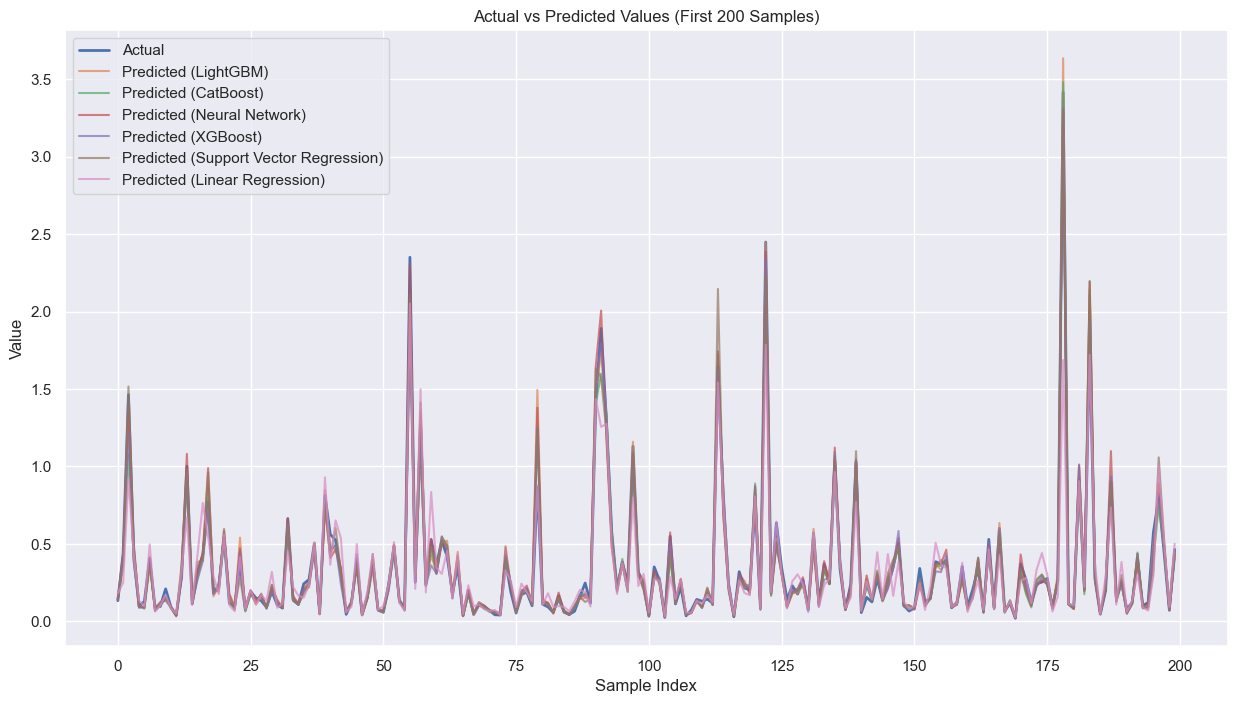

In [42]:
size = len(y_pred_recs)
# Plot all results into 1 figure showing test data vs. pred data
plt.figure(figsize=(15,8))
sample_no = 200
plt.plot(y_test_ori[:sample_no], label='Actual', linewidth=2)
for i,v in enumerate(sorted_model_names):
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    plt.plot(y_pred_recs[i][:sample_no], label=f'Predicted ({desc})', alpha=0.7)
plt.title(f"Actual vs Predicted Values (First {sample_no} Samples)")
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

3.3 Model Interpretation
We have trained a machine learning model and now we want to interpret our model to
understand its behaviour. In particular, we are interested to know the following global
interpretation:
• Feature effect plot: a summary plot showing the contribution of features to the
prediction
• Partial dependency between target and features: if you’re using dependency plot,
you do not have to show plot for all features but up to five “significant” plots -
those that has the largest effect or abnormal ones that contain much information)
• Feature importance plot: you need to present a complete feature importance plot
for all features you used, including those you created if there is any
• Feature interaction plot: you need to identify 2 pairs of features that are most
correlated with each other in terms of the prediction task

In [ ]:
# Feature effect plot: a summary plot showing the contribution of features to the prediction
# Partial dependency between target and features: if you’re using dependency plot,
#  you do not have to show plot for all features but up to five “significant” plots -
#  those that has the largest effect or abnormal ones that contain much information)
# Feature importance plot: you need to present a complete feature importance plot
#  for all features you used, including those you created if there is any
# Feature interaction plot: you need to identify 2 pairs of features that are most
#  correlated with each other in terms of the prediction task

In [46]:
def plot_feature_importance(features, importances, title="Feature Importance", figsize=(10,20), color='g'):
    # Create a DataFrame from the inputs and sort by importance
    importance_df = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', key=abs, ascending=False)
    # Plot a horizontal bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(importance_df['feature'], importance_df['importance'], color=color)
    plt.xlabel("Feature Importance")
    plt.title(title)
    # Add data labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', 
                ha='left', va='center', fontweight='bold')
    plt.gca().invert_yaxis() # Ensure the highest importance is on top
    plt.tight_layout()
    plt.show()


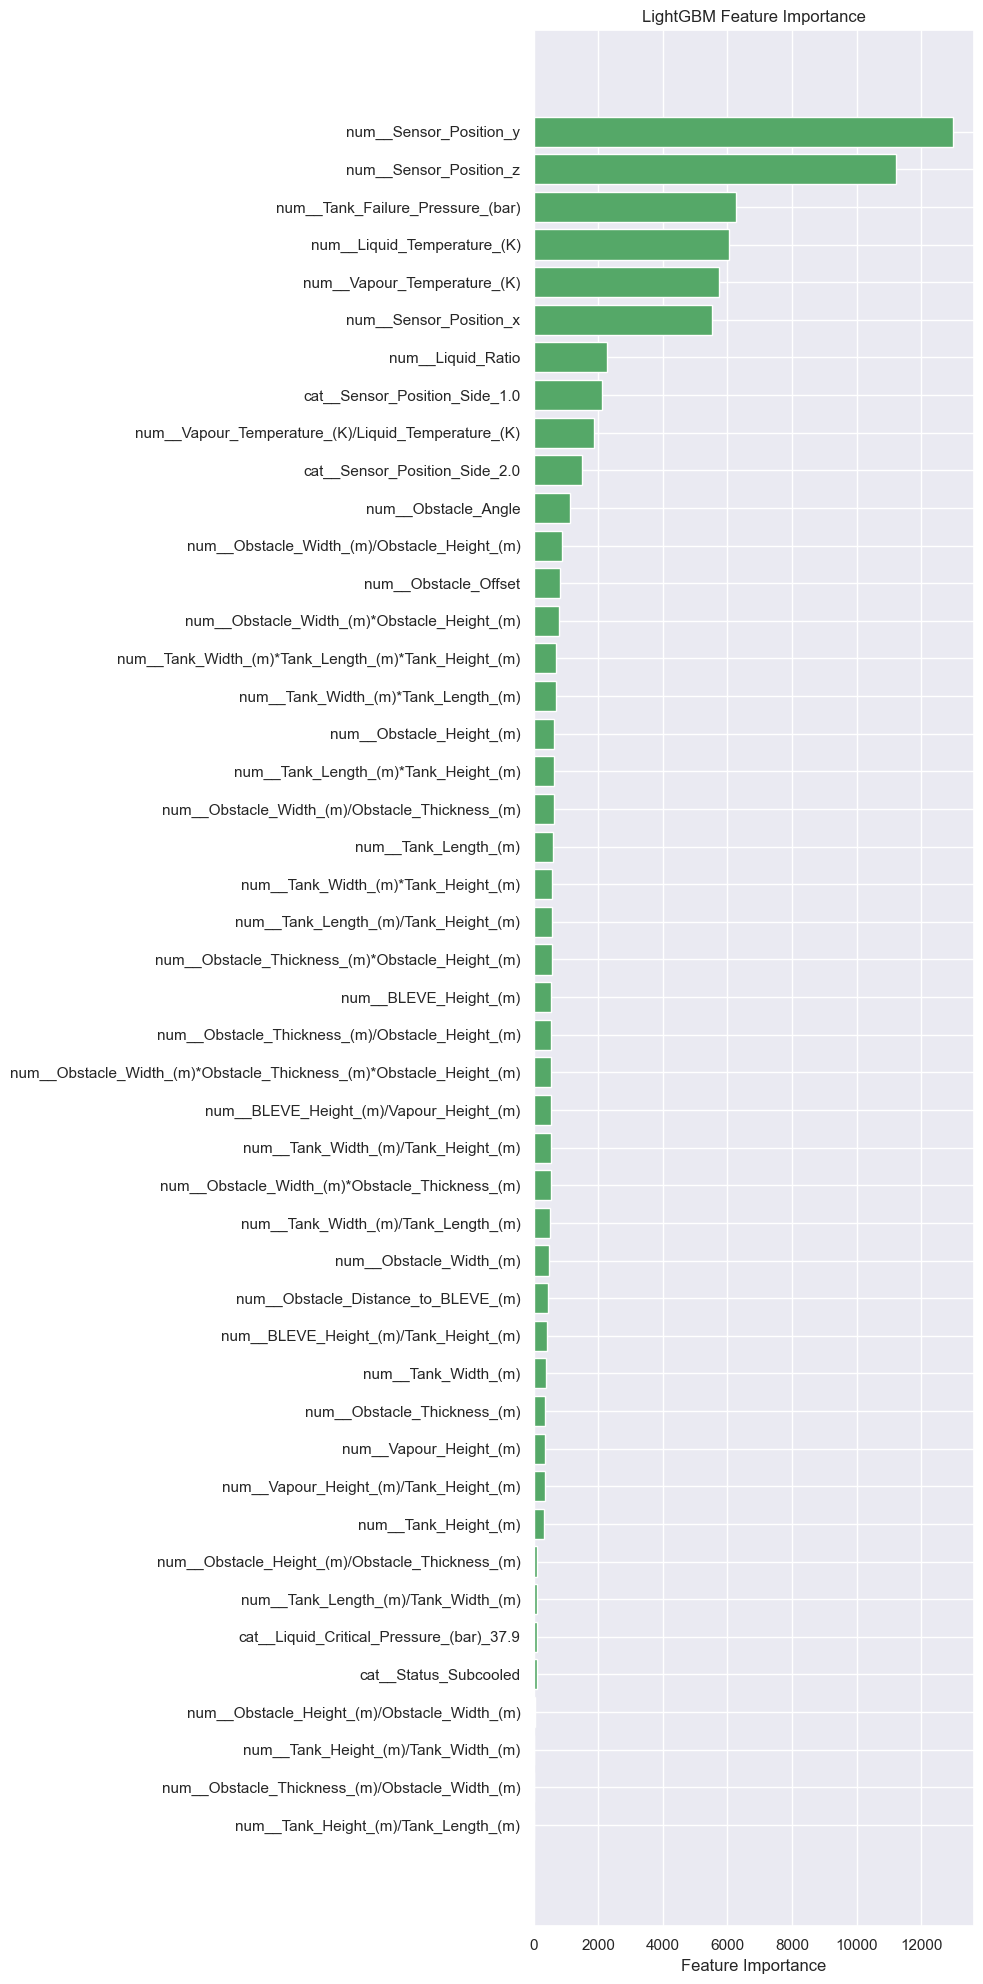

 num__Tank_Failure_Pressure_(bar): 6257
 num__Liquid_Ratio: 2284
 num__Tank_Width_(m): 378
 num__Tank_Length_(m): 597
 num__Tank_Height_(m): 330
 num__BLEVE_Height_(m): 542
 num__Vapour_Height_(m): 356
 num__Vapour_Temperature_(K): 5750
 num__Liquid_Temperature_(K): 6052
 num__Obstacle_Distance_to_BLEVE_(m): 459
 num__Obstacle_Width_(m): 464
 num__Obstacle_Height_(m): 634
 num__Obstacle_Thickness_(m): 360
 num__Obstacle_Angle: 1127
 num__Sensor_Position_x: 5514
 num__Sensor_Position_y: 12989
 num__Sensor_Position_z: 11217
 num__Tank_Width_(m)/Tank_Length_(m): 513
 num__Tank_Width_(m)/Tank_Height_(m): 527
 num__Tank_Length_(m)/Tank_Height_(m): 579
 num__Tank_Width_(m)*Tank_Length_(m): 684
 num__Tank_Length_(m)/Tank_Width_(m): 105
 num__Tank_Height_(m)/Tank_Width_(m): 5
 num__Tank_Height_(m)/Tank_Length_(m): 0
 num__Tank_Width_(m)*Tank_Height_(m): 582
 num__Tank_Length_(m)*Tank_Height_(m): 622
 num__Tank_Width_(m)*Tank_Length_(m)*Tank_Height_(m): 704
 num__Vapour_Height_(m)/Tank_Height_(

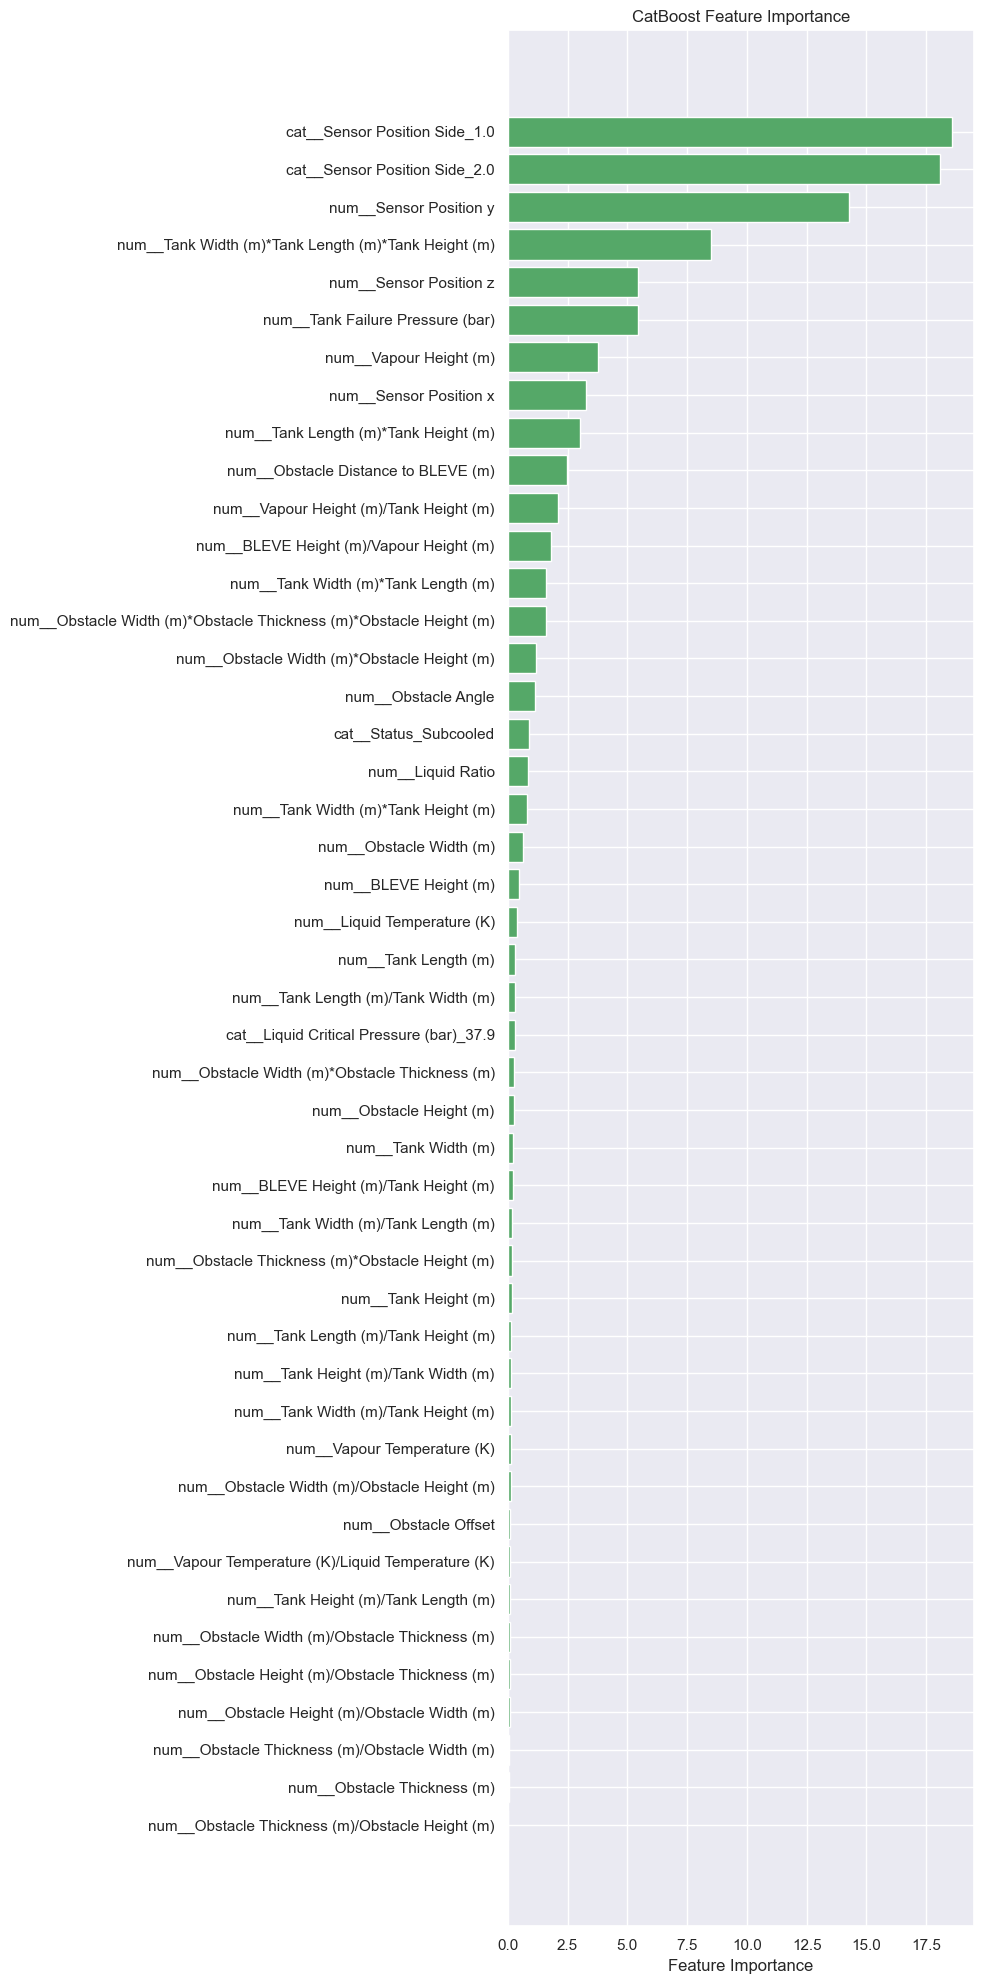

 num__Tank Failure Pressure (bar): 5.432077574895278
 num__Liquid Ratio: 0.8442605471010706
 num__Tank Width (m): 0.21211355876589616
 num__Tank Length (m): 0.31002960442156086
 num__Tank Height (m): 0.17046035923497643
 num__BLEVE Height (m): 0.448689250247456
 num__Vapour Height (m): 3.790675577573204
 num__Vapour Temperature (K): 0.12326950022508416
 num__Liquid Temperature (K): 0.3964584640206453
 num__Obstacle Distance to BLEVE (m): 2.455844825026147
 num__Obstacle Width (m): 0.6186761892243079
 num__Obstacle Height (m): 0.2461674997719152
 num__Obstacle Thickness (m): 0.03203282398762504
 num__Obstacle Angle: 1.1540314257573236
 num__Sensor Position x: 3.284119836067008
 num__Sensor Position y: 14.251876707388083
 num__Sensor Position z: 5.4566999443773785
 num__Tank Width (m)/Tank Length (m): 0.1944775398512177
 num__Tank Width (m)/Tank Height (m): 0.1330387242927881
 num__Tank Length (m)/Tank Height (m): 0.14708087636144787
 num__Tank Width (m)*Tank Length (m): 1.60608934194540

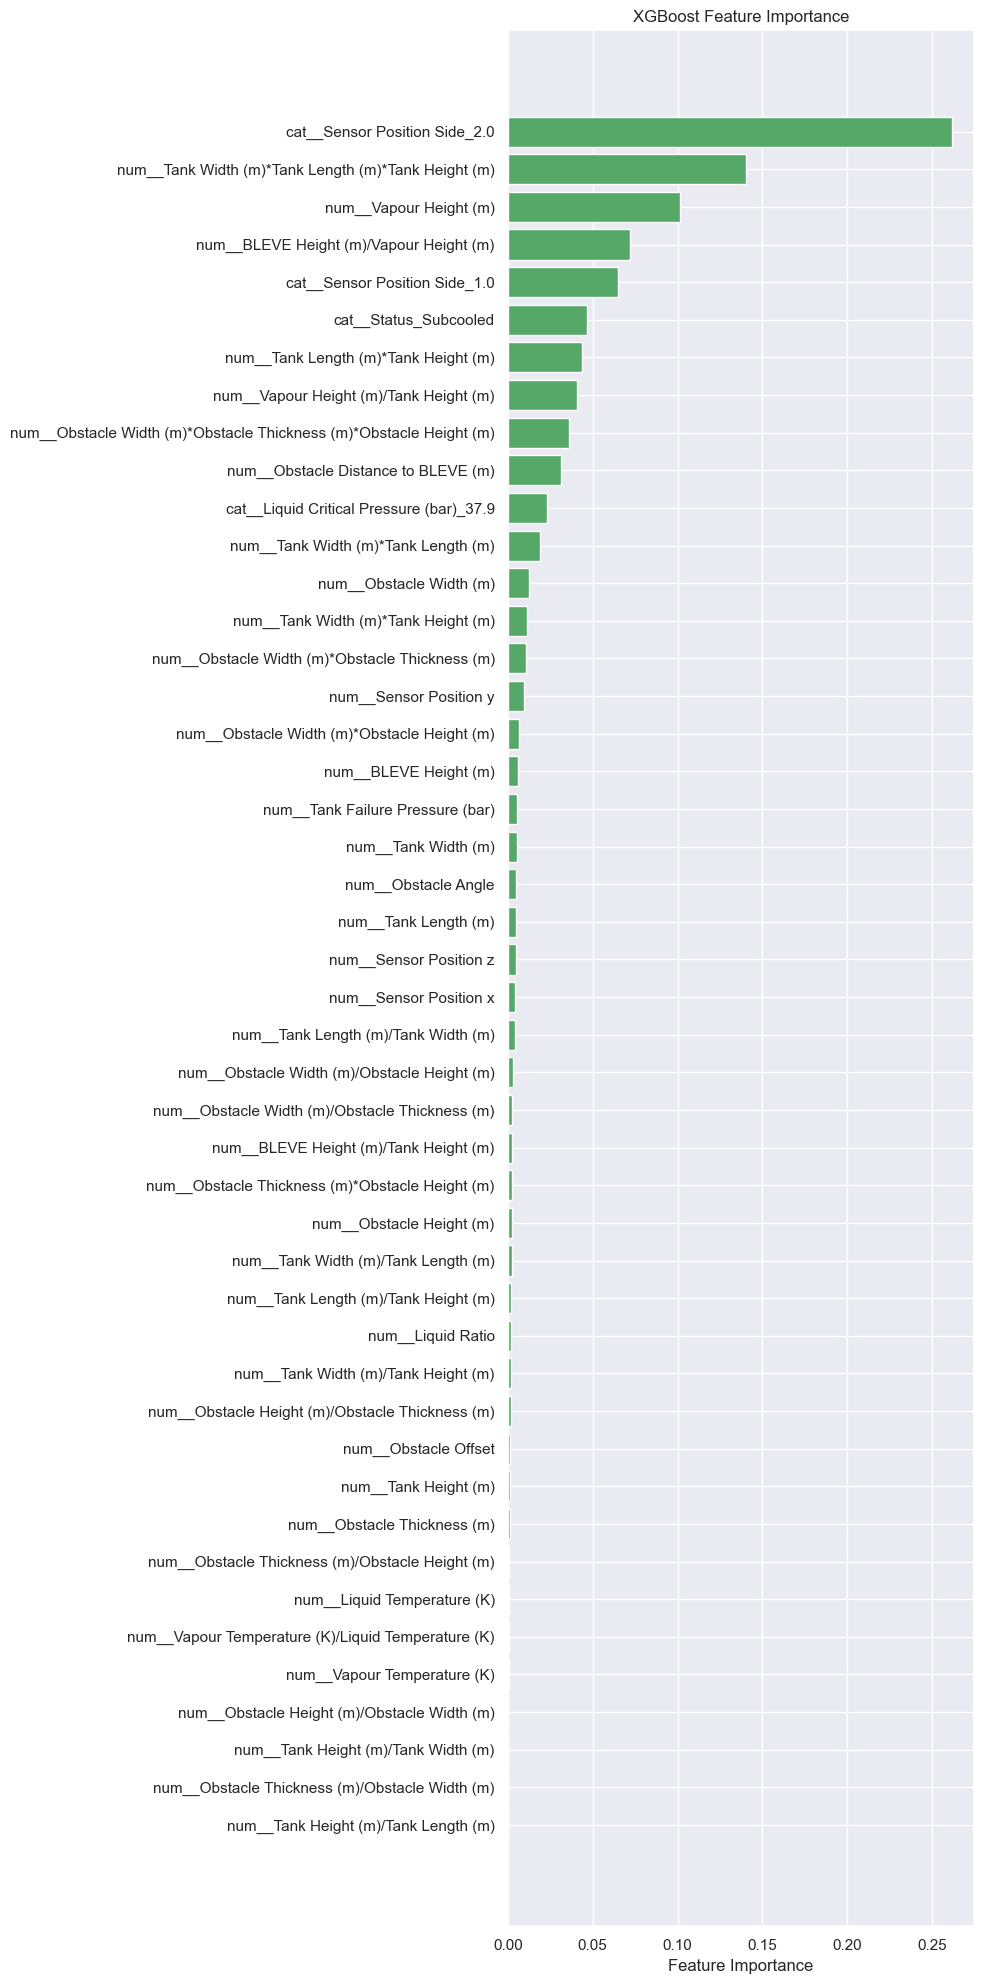

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


 num__Tank Failure Pressure (bar): 0.005507281981408596
 num__Liquid Ratio: 0.001904219388961792
 num__Tank Width (m): 0.005381429567933083
 num__Tank Length (m): 0.004595263861119747
 num__Tank Height (m): 0.0012277505593374372
 num__BLEVE Height (m): 0.005710028577595949
 num__Vapour Height (m): 0.1015130877494812
 num__Vapour Temperature (K): 0.0005068738828413188
 num__Liquid Temperature (K): 0.0009232228621840477
 num__Obstacle Distance to BLEVE (m): 0.03126315027475357
 num__Obstacle Width (m): 0.012657824903726578
 num__Obstacle Height (m): 0.00237998366355896
 num__Obstacle Thickness (m): 0.0011777732288464904
 num__Obstacle Angle: 0.004636523313820362
 num__Sensor Position x: 0.004409469198435545
 num__Sensor Position y: 0.009774725884199142
 num__Sensor Position z: 0.0045439861714839935
 num__Tank Width (m)/Tank Length (m): 0.0022305501624941826
 num__Tank Width (m)/Tank Height (m): 0.0017116268863901496
 num__Tank Length (m)/Tank Height (m): 0.00201395689509809
 num__Tank Wi

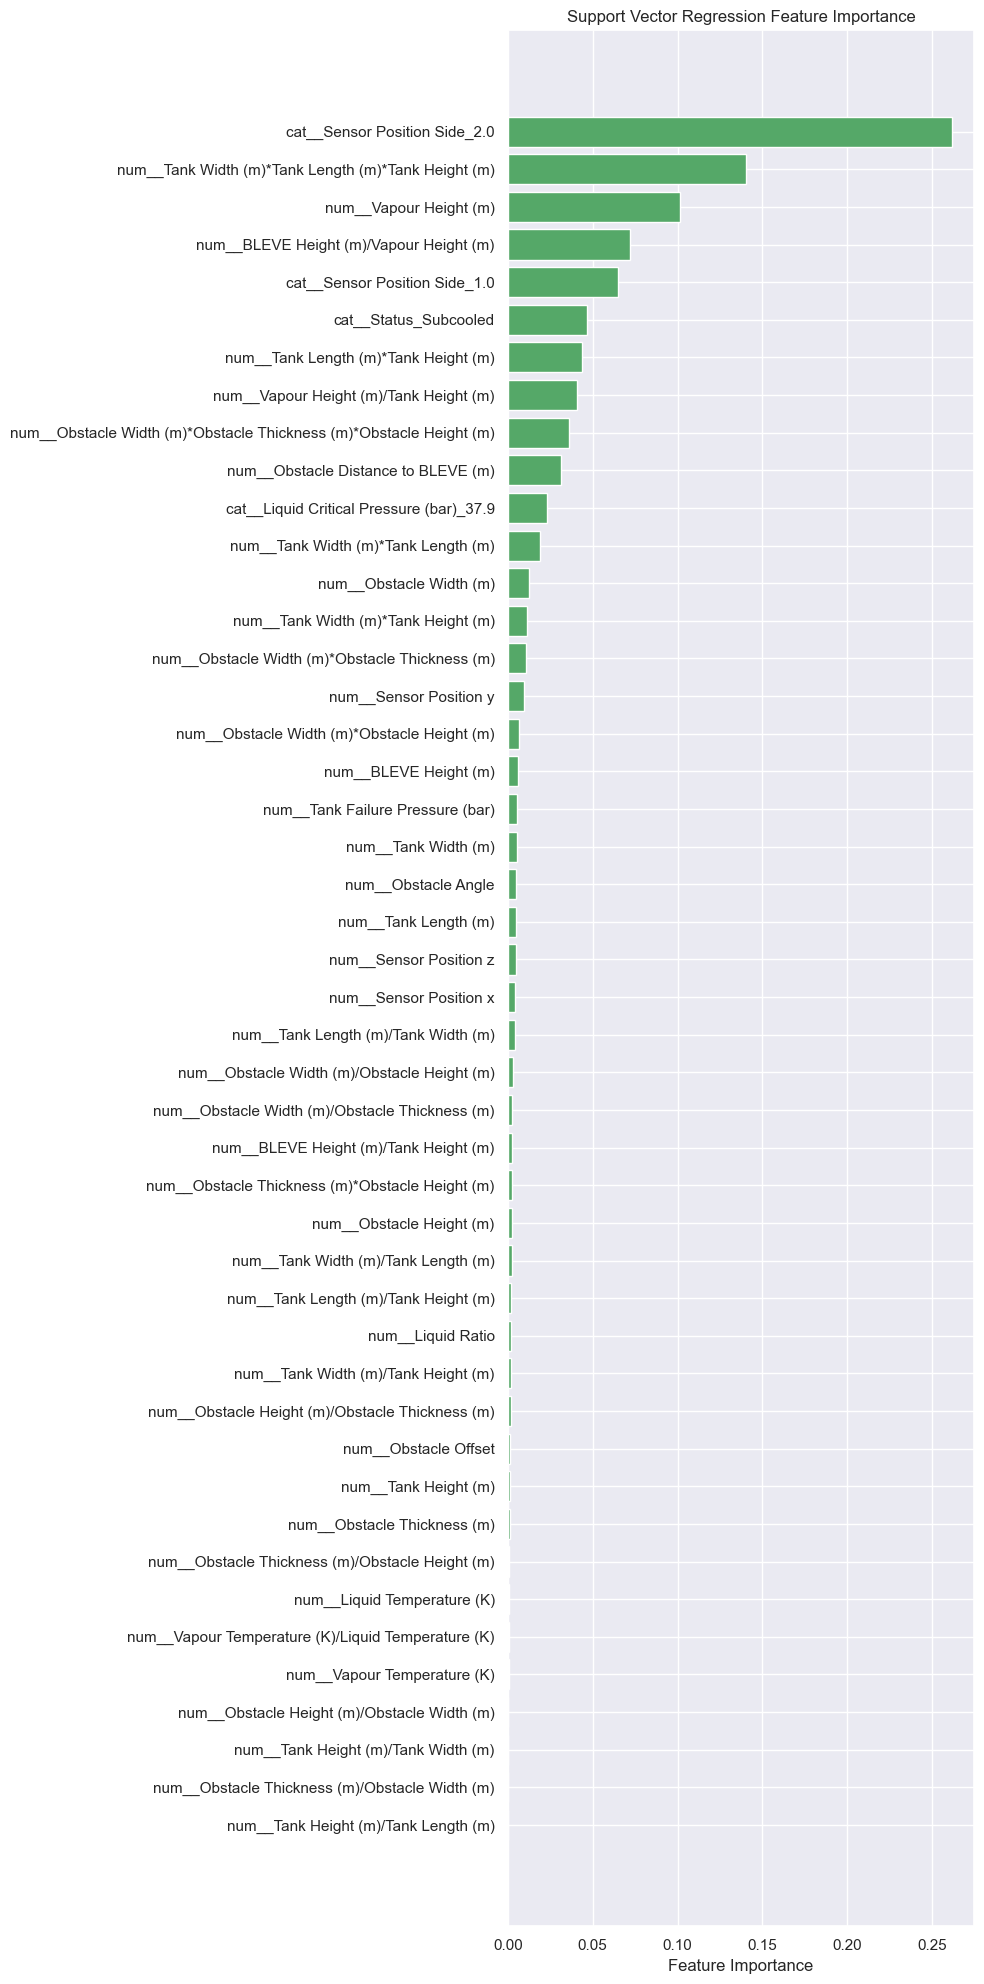

 num__Tank Failure Pressure (bar): 0.005507281981408596
 num__Liquid Ratio: 0.001904219388961792
 num__Tank Width (m): 0.005381429567933083
 num__Tank Length (m): 0.004595263861119747
 num__Tank Height (m): 0.0012277505593374372
 num__BLEVE Height (m): 0.005710028577595949
 num__Vapour Height (m): 0.1015130877494812
 num__Vapour Temperature (K): 0.0005068738828413188
 num__Liquid Temperature (K): 0.0009232228621840477
 num__Obstacle Distance to BLEVE (m): 0.03126315027475357
 num__Obstacle Width (m): 0.012657824903726578
 num__Obstacle Height (m): 0.00237998366355896
 num__Obstacle Thickness (m): 0.0011777732288464904
 num__Obstacle Angle: 0.004636523313820362
 num__Sensor Position x: 0.004409469198435545
 num__Sensor Position y: 0.009774725884199142
 num__Sensor Position z: 0.0045439861714839935
 num__Tank Width (m)/Tank Length (m): 0.0022305501624941826
 num__Tank Width (m)/Tank Height (m): 0.0017116268863901496
 num__Tank Length (m)/Tank Height (m): 0.00201395689509809
 num__Tank Wi

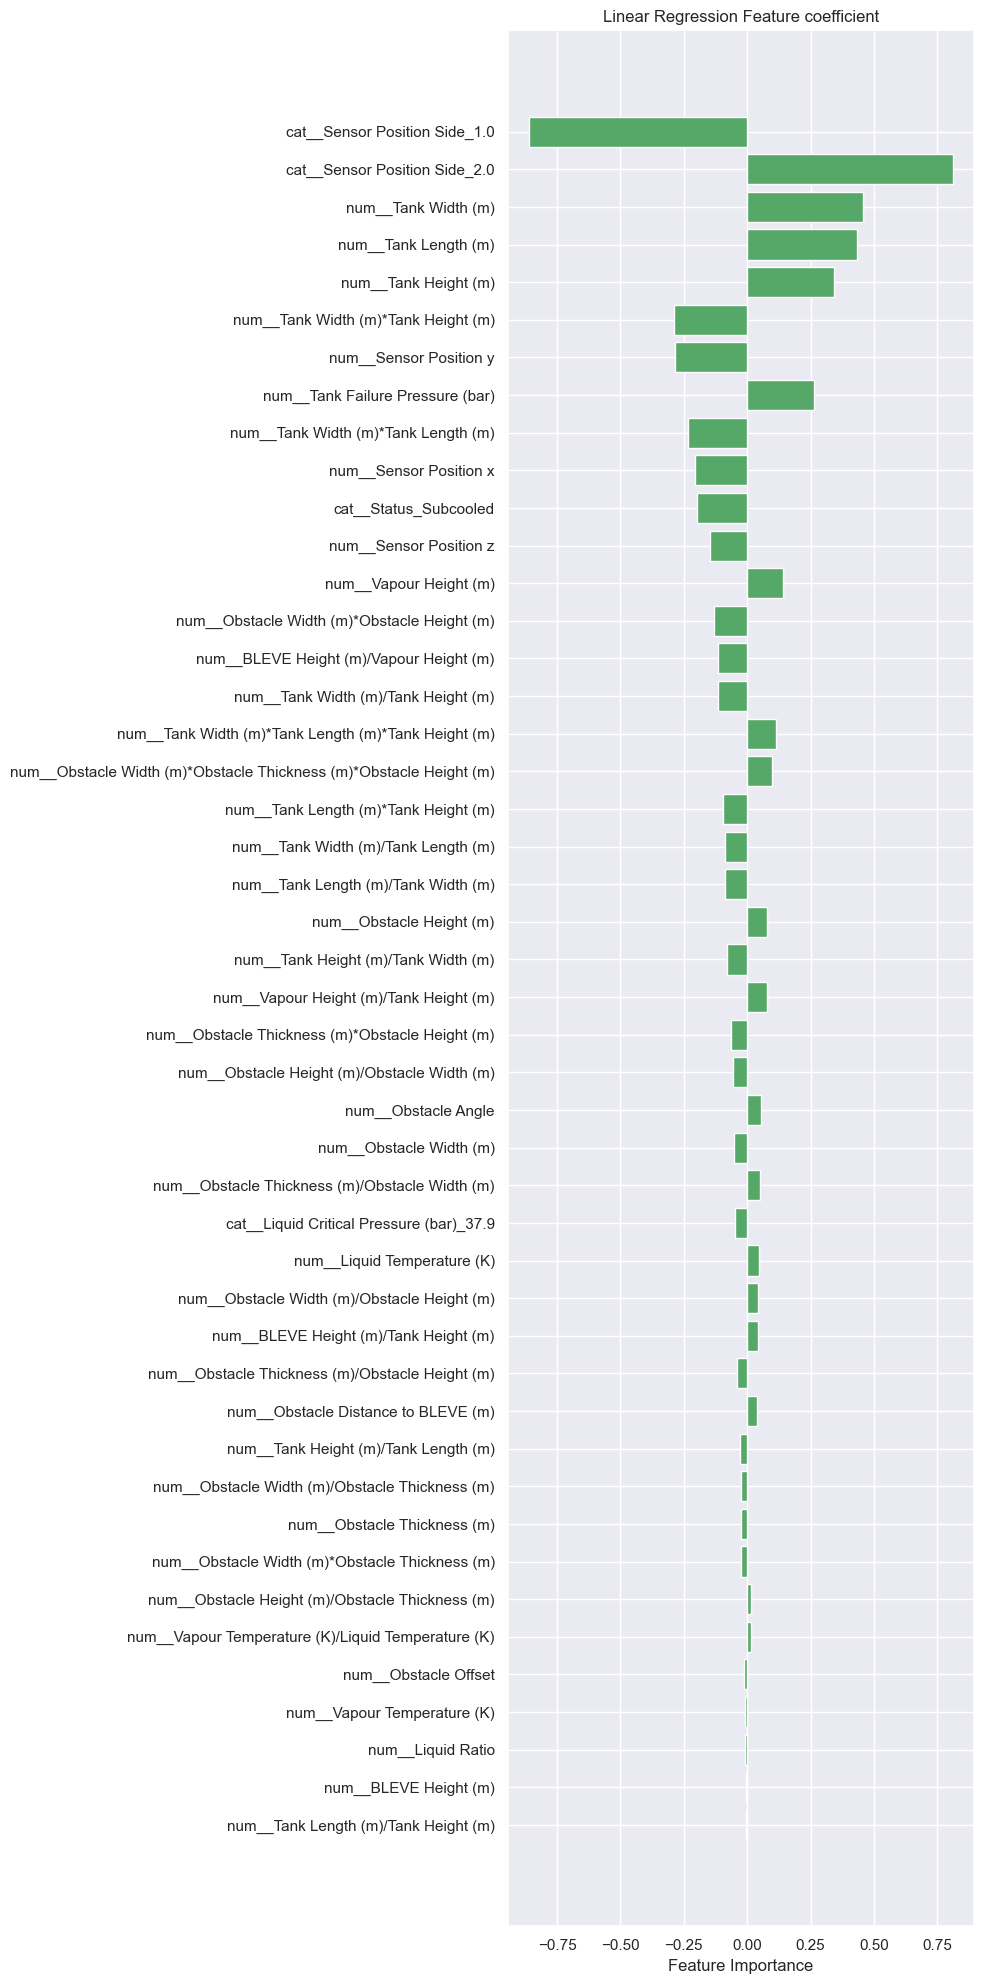

 num__Tank Failure Pressure (bar): 0.2645537257194519
 num__Liquid Ratio: -0.008966326713562012
 num__Tank Width (m): 0.45682772994041443
 num__Tank Length (m): 0.4348515570163727
 num__Tank Height (m): 0.3408813774585724
 num__BLEVE Height (m): -0.006270600017160177
 num__Vapour Height (m): 0.14044854044914246
 num__Vapour Temperature (K): -0.0091591477394104
 num__Liquid Temperature (K): 0.04478948935866356
 num__Obstacle Distance to BLEVE (m): 0.03750039264559746
 num__Obstacle Width (m): -0.05193976312875748
 num__Obstacle Height (m): 0.07977769523859024
 num__Obstacle Thickness (m): -0.02486918307840824
 num__Obstacle Angle: 0.05563304200768471
 num__Sensor Position x: -0.2073775827884674
 num__Sensor Position y: -0.2863743007183075
 num__Sensor Position z: -0.1466555893421173
 num__Tank Width (m)/Tank Length (m): -0.08797486126422882
 num__Tank Width (m)/Tank Height (m): -0.11404762417078018
 num__Tank Length (m)/Tank Height (m): -0.004122048616409302
 num__Tank Width (m)*Tank Le

In [45]:
for v in sorted_model_names:
    continue # TODO
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    model = model[-1]
    title=f'{desc} Feature Importance'
    if hasattr(model, 'feature_names_in_'):
        features = model.feature_names_in_
    elif hasattr(model, 'feature_names_'):
        features = model.feature_names_
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_.reshape(-1)
        title=f'{desc} Feature coefficient'
    elif hasattr(model, 'coefs_'):
        # NN models
        continue
    else:
        print(desc)
        if desc == 'Support Vector Regression':
            print('model', model.n_features_in_, model.feature_names_in_)
            # out = model.transform(X_train_prep)
            results = permutation_importance(model, X_test, y_test, n_jobs=-2, n_repeats=5, random_state=42)
            impotances = results.importances_mean
        else:
            print(model)
            # break here
            1/0
    plot_feature_importance(features=features, importances=importances, title=title)
    # Print features with importance
    for feature, importance in zip(features, importances):
        print(f" {feature}: {importance}")

In [44]:
def convertFeatureNames(col_names, features):
    ori_features = []
    cols_name_converted = [col_name.replace(' ', '_') for col_name in col_names]
    for feature in features:
        if feature in col_names:
            ori_features.append(feature)
        elif feature in cols_name_converted:
            ori_features.append(col_names[cols_name_converted.index(feature)])
    return ori_features

In [43]:
def showPDP(model, X_train, features):
    ori_features = convertFeatureNames(X_train.columns, features)
    from sklearn.inspection import PartialDependenceDisplay
    fig, ax = plt.subplots(figsize=(12, 12))
    PartialDependenceDisplay.from_estimator(model, X_train, ori_features, kind='average', ax=ax)
    plt.show()

In [42]:
for v in sorted_model_names:
    continue # TODO
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    model = model[-1]
    if hasattr(model, 'feature_names_in_'):
        features = model.feature_names_in_
    elif hasattr(model, 'feature_names_'):
        features = model.feature_names_
    showPDP(model, X_test, features)

In [50]:
def showShap(model_name, model, X_train, X_test, features):
    import shap
    shap.initjs()
    features = convertFeatureNames(X_train.columns, features)
    if model_name == 'Linear Regression':
        # For linear model
        explainer_shap = shap.LinearExplainer(model, X_train)
    elif model_name == 'XGBoost' or model_name == 'LightGBM' or model_name == 'CatBoost':
        # For Random forest
        explainer_shap = shap.TreeExplainer(model)
    elif model_name == "Support Vector Regression":
        explainer_shap = shap.KernelExplainer(model.predict, X_train)
    elif model_name == "Neural Network":
        explainer_shap = shap.DeepExplainer(model, X_train)
    shap_values = explainer_shap.shap_values(X_test.iloc[:100])
    # shap_values = explainer_shap(X_test)
    # --------------------------
    # TODO: Force Plot for a Single Prediction
    # --------------------------
    # Generate a force plot for the first test instance
    shap.force_plot(explainer_shap.expected_value, shap_values[0], X_test.iloc[0])
    # --------------------------
    # TODO: SHAP Summary Plot (Global Feature Importance)
    # --------------------------
    shap.summary_plot(shap_values, X_test.iloc[:100])
    # --------------------------
    # TODO: SHAP Dependence Plot (Interaction Plot) for a feature (e.g., 'temp')
    # --------------------------
    for feature in features:
        shap.dependence_plot(feature, shap_values, X_test.iloc[:100])
        break # TODO
    shap_values = explainer_shap.shap_values(X_test.iloc[:100])
    shap.plots.beeswarm(explainer_shap(X_test))
    shap.plots.waterfall(explainer_shap(X_test)[0])

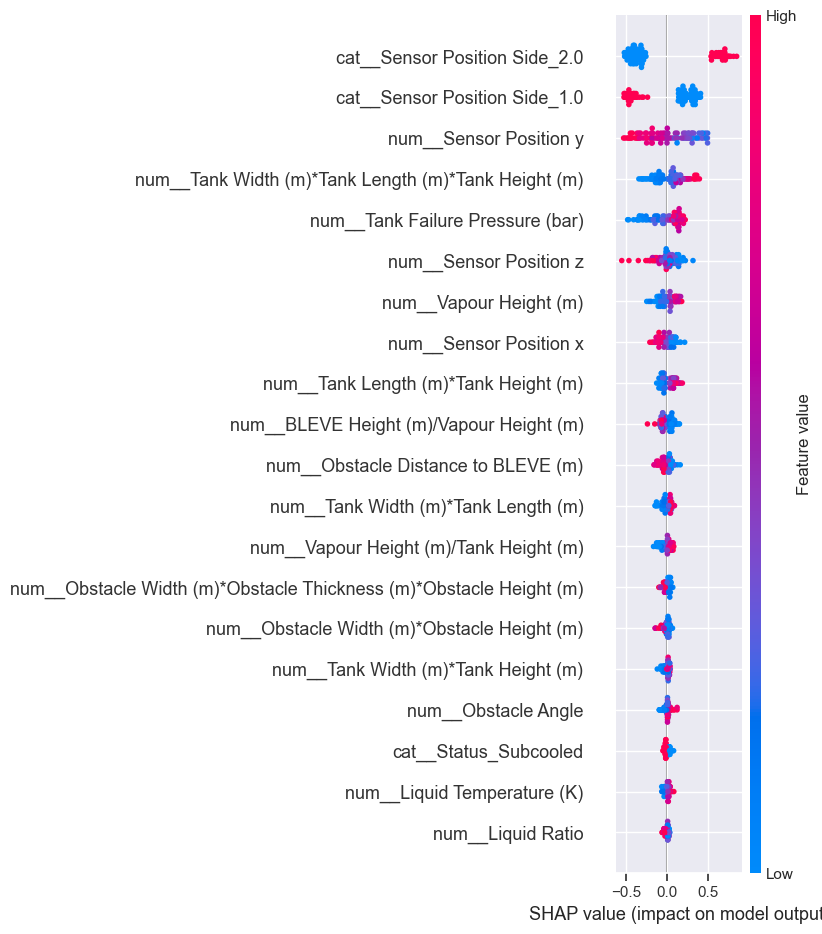

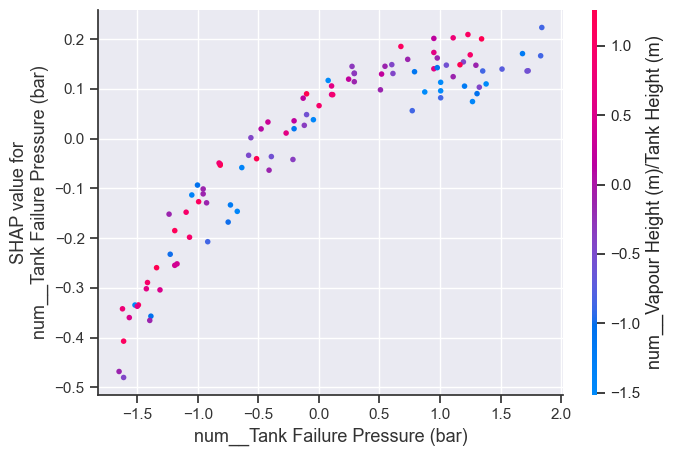

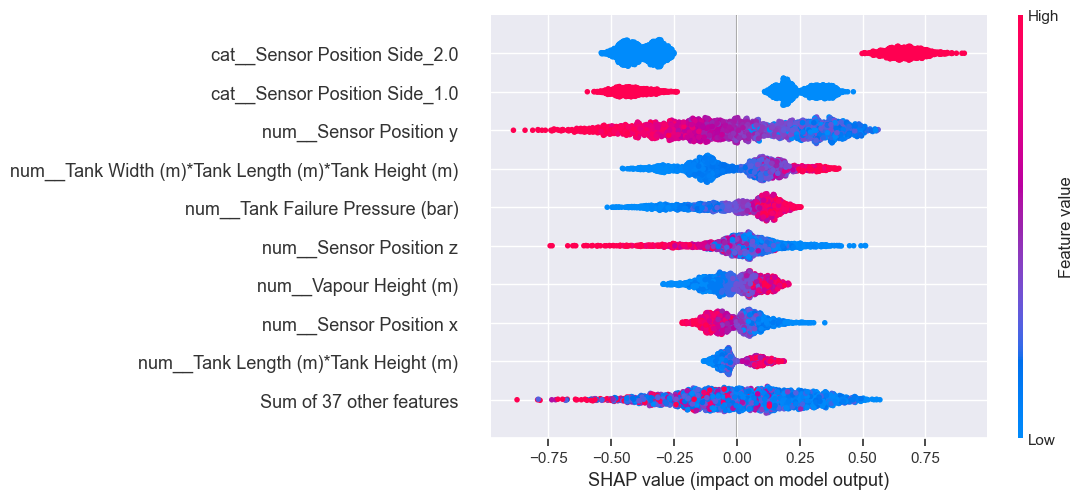

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1935, 46)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [51]:
for v in sorted_model_names:
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    model = model[-1]
    if hasattr(model, 'feature_names_in_'):
        features = model.feature_names_in_
    elif hasattr(model, 'feature_names_'):
        features = model.feature_names_
    showShap(desc, model, X_train, X_test, features)

In [ ]:
def showPI(model, X_test, y_test):
    # Post hoc interpretability
    from sklearn.inspection import permutation_importance
    # Compute permutation importance
    results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    # Plot with the utility function
    plot_feature_importance(features=X_test.columns, importances=results.importances_mean)

In [ ]:
for v in sorted_model_names:
    desc =  model_dict.get(v).get(TAG_NAME)
    model = model_dict.get(v).get(TAG_BEST_EST)
    model = model[-1]
    if hasattr(model, 'feature_names_in_'):
        features = model.feature_names_in_
    elif hasattr(model, 'feature_names_'):
        features = model.feature_names_
    showPI(model, X_test, y_test)

In [ ]:
def showALE(model, X_train, features):
    from alibi.explainers import ALE
    from alibi.explainers import plot_ale
    # TODO: Generate ALE plots using the ALE explainer
    # Convert data to numpy if necessary
    X_subset = X_train.iloc[:100].to_numpy()
    ale = ALE(model.predict, feature_names=X_train.columns.tolist())
    ale_exp = ale.explain(X_subset, features=features) # adjust feature indices as needed
    # Plot ALE curves
    plot_ale(ale_exp)

In [ ]:
def showLime(X_train, X_test, model):
    import lime
    import lime.lime_tabular
    # TODO: Initialize LimeTabularExplainer and explain a test instance
    explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode='regression',
    kernel_width=3
    )
    # Choose a test instance (change idx as needed)
    idx = 0
    exp = explainer.explain_instance(X_test.iloc[idx].values, model.predict, num_features=5)
    exp.show_in_notebook(show_all=False)